In [4]:
import pandas as pd 
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x).rstrip('0').rstrip('.') if x != 0 else '0')
import numpy as np 
np.set_printoptions(suppress=True, precision=6)
import polars as pl 
pl.Config(set_fmt_float="full")
pl.Config(tbl_cols=1000)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os 
import seaborn as sns
np.random.seed(22)
import torch 
from packages.utils2 import Optimize, JointOptimize
from packages.utils2 import SaveParameters, LoadParameters, JointDisplayResults, JointSaveParameters, JointLoadParameters
from packages.utils2 import prepare_data_level0, prepare_data_level1, prepare_data_level2, prepare_data_level3

device = 'cpu'

In [5]:
import sys
import os

# Ajouter le chemin du dossier parent
packages_path = r"c:\Users\bouss\Downloads\Codes\Codes\ConduiteProjetMISE_2024_25"
if packages_path not in sys.path:
    sys.path.append(packages_path)
    print(f"Ajout du chemin: {packages_path}")

Ajout du chemin: c:\Users\bouss\Downloads\Codes\Codes\ConduiteProjetMISE_2024_25


In [6]:
import sys
!{sys.executable} -m pip install joblib numdifftools


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import sys
!{sys.executable} -m pip install tqdm scipy


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import sys
!{sys.executable} -m pip install geopandas


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import sys
import os

# Ajouter le chemin du dossier packages
packages_path = r"c:\Users\bouss\Downloads\Codes\Codes\ConduiteProjetMISE_2024_25"
if packages_path not in sys.path:
    sys.path.append(packages_path)
    print(f"Ajout du chemin: {packages_path}")

# Vérifier que le dossier packages existe au bon endroit
packages_dir = os.path.join(packages_path, "packages")
print(f"Le dossier 'packages' existe-t-il ? {os.path.exists(packages_dir)}")

Le dossier 'packages' existe-t-il ? False


In [10]:
import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn torch polars


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import sys
!{sys.executable} -m pip install pyarrow


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import sys
!{sys.executable} -m pip install pyarrow fastparquet


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
# Charger les données depuis le fichier Parquet
data_brut = pd.read_parquet(r'C:\Users\bouss\couple_biactives_2015 (1).parquet')

# Vérification des valeurs manquantes dans chaque colonne
missing_values = data_brut.isnull().sum()
print(missing_values)

# Afficher le nombre d'observations (lignes) dans la base de données
num_observations = data_brut.shape[0]
print(f"Nombre total d'observations: {num_observations}")

ID                 0
AGED_m             0
COUPLE_m           0
CS1_m              0
DIPL_m             0
                  ..
RES_PARIS          0
WOMANtowardsMAN    0
MANtowardsWOMAN    0
HOMEOWNERSHIP      0
INTRAZONAL         0
Length: 135, dtype: int64
Nombre total d'observations: 282271


In [29]:
# Chargement des données
data_yes_intrazonal = data_brut  # Ou data_brut si vous avez décidé de ne pas faire l'étape de nettoyage

# Filtrer les données avec et sans Intrazonal
data_no_intrazonal = data_yes_intrazonal[data_yes_intrazonal['INTRAZONAL'] == 0]

# Si vos données sont déjà en format Pandas, pas besoin de conversion
# Sinon, décommentez les lignes suivantes si vous utilisez Polars
# df_yes_intrazonal = data_yes_intrazonal.to_pandas()  
# df_no_intrazonal = data_no_intrazonal.to_pandas()

# Utiliser directement les variables si vous êtes déjà en Pandas
df_yes_intrazonal = data_yes_intrazonal
df_no_intrazonal = data_no_intrazonal

# Afficher la liste des variables (noms des colonnes)
print(df_yes_intrazonal.columns.tolist())

# Vérifier les tailles des deux ensembles de données
print(f"Nombre d'observations avec Intrazonal: {df_yes_intrazonal.shape[0]}")
print(f"Nombre d'observations sans Intrazonal: {df_no_intrazonal.shape[0]}")

['ID', 'AGED_m', 'COUPLE_m', 'CS1_m', 'DIPL_m', 'DNAI_m', 'EMPL_m', 'ETUD_m', 'ILETUD_m', 'ILT_m', 'IMMI_m', 'INAI_m', 'INATC_m', 'IPONDI_m', 'LPRM_m', 'MOCO_m', 'MODV_m', 'NA17_m', 'NA5_m', 'NAIDT_m', 'ORIDT_m', 'SEXE_m', 'STAT_CONJ_m', 'STATR_m', 'TACT_m', 'TP_m', 'TRANS_m', 'DCLT_m', 'OCCP_SELF_EMPLOYED_m', 'OCCP_BLUE_COLLAR_m', 'OCCP_WHITE_COLLAR_m', 'OCCP_PROFESSIONAL_m', 'OCCP_EMPLOYEE_m', 'WP_INNERRING_m', 'WP_OUTERRING_m', 'WP_PARIS_m', 'TT_VP_m', 'TT_TC_m', 'FREEFLOW_TT_m', 'DISTANCE_m', 'COMMUTE_MODE_m', 'FULL_TIME_m', 'FOREIGN_m', 'AGED_w', 'COUPLE_w', 'CS1_w', 'DIPL_w', 'DNAI_w', 'EMPL_w', 'ETUD_w', 'ILETUD_w', 'ILT_w', 'IMMI_w', 'INAI_w', 'INATC_w', 'IPONDI_w', 'LPRM_w', 'MOCO_w', 'MODV_w', 'NA17_w', 'NA5_w', 'NAIDT_w', 'ORIDT_w', 'SEXE_w', 'STAT_CONJ_w', 'STATR_w', 'TACT_w', 'TP_w', 'TRANS_w', 'DCLT_w', 'OCCP_SELF_EMPLOYED_w', 'OCCP_BLUE_COLLAR_w', 'OCCP_WHITE_COLLAR_w', 'OCCP_PROFESSIONAL_w', 'OCCP_EMPLOYEE_w', 'WP_INNERRING_w', 'WP_OUTERRING_w', 'WP_PARIS_w', 'TT_VP_w',

In [18]:
import pandas as pd
import numpy as np

# Options d'affichage
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Variables importantes pour vos modèles
key_vars = [
    # Variables numériques clés (10 au lieu de 20)
    'TT_VP_m', 'TT_VP_w', 'DISTANCE_m', 'DISTANCE_w', 
    'AGED_m', 'AGED_w', 'NUMMI', 'SURF',
    'CHILDREN_0_16', 'VOIT',
    
    # Variables catégorielles clés (5 au lieu de 15)
    'RES_PARIS', 'HOMEOWNERSHIP', 'GARL', 'TRANS_m', 'TRANS_w'
]

# Fonction simplifiée pour l'analyse - sans visualisation
def analyze_var_simple(col, df_yes, df_no):
    print("\n" + "="*50)
    print(f"VARIABLE: {col}")
    print("="*50)
    
    # Vérifier si la variable existe
    if col not in df_yes.columns:
        print(f"Variable '{col}' non trouvée dans les données")
        return
    
    # Statistiques de base
    print("\nAVEC INTRAZONAL:")
    if df_yes[col].dtype.kind in 'ifc':  # Numérique
        stats_with = df_yes[col].describe().to_dict()
        for stat, val in stats_with.items():
            print(f"  {stat}: {val}")
    else:  # Catégorielle
        val_counts = df_yes[col].value_counts(normalize=True).head(5) * 100
        print("  Top 5 catégories (%):")
        for val, pct in val_counts.items():
            print(f"  {val}: {pct:.1f}%")
    
    print("\nSANS INTRAZONAL:")
    if df_no[col].dtype.kind in 'ifc':  # Numérique
        stats_without = df_no[col].describe().to_dict()
        for stat, val in stats_without.items():
            print(f"  {stat}: {val}")
    else:  # Catégorielle
        val_counts = df_no[col].value_counts(normalize=True).head(5) * 100
        print("  Top 5 catégories (%):")
        for val, pct in val_counts.items():
            print(f"  {val}: {pct:.1f}%")
    
    # Pour les variables numériques, calculer la différence des moyennes
    if df_yes[col].dtype.kind in 'ifc':
        diff_pct = ((stats_without['mean'] - stats_with['mean']) / stats_with['mean'] * 100 
                    if stats_with['mean'] != 0 else np.nan)
        print(f"\nDIFFÉRENCE: La moyenne est {diff_pct:.1f}% {'plus élevée' if diff_pct > 0 else 'plus basse'} sans Intrazonal")

# Analyser chaque variable séparément pour éviter les problèmes de mémoire
for var in key_vars:
    try:
        analyze_var_simple(var, df_yes_intrazonal, df_no_intrazonal)
    except Exception as e:
        print(f"Erreur lors de l'analyse de {var}: {e}")
    
    # Forcer la libération de mémoire
    import gc
    gc.collect()

print("\nAnalyse terminée!")


VARIABLE: TT_VP_m

AVEC INTRAZONAL:
  count: 282271.0
  mean: 0.3444191844992041
  std: 0.27082837484203776
  min: 0.016376807447833028
  25%: 0.0757868004824506
  50%: 0.3055496882670183
  75%: 0.5209932579375517
  max: 2.0408175156218173

SANS INTRAZONAL:
  count: 173560.0
  mean: 0.45417462949480913
  std: 0.2394899171071751
  min: 0.04666666666666666
  25%: 0.27089860989505493
  50%: 0.41976836294432274
  75%: 0.6003625130654426
  max: 2.0408175156218173

DIFFÉRENCE: La moyenne est 31.9% plus élevée sans Intrazonal

VARIABLE: TT_VP_w

AVEC INTRAZONAL:
  count: 282271.0
  mean: 0.3002833655496431
  std: 0.25025326460810426
  min: 0.016376807447833028
  25%: 0.06804418933415723
  50%: 0.24540599604214922
  75%: 0.453890123018358
  max: 2.03666864073868

SANS INTRAZONAL:
  count: 173560.0
  mean: 0.4079363806760715
  std: 0.22942135027595265
  min: 0.04666666666666666
  25%: 0.22703979525520013
  50%: 0.36591197841930645
  75%: 0.5445345745501202
  max: 2.03666864073868

DIFFÉRENCE: 

In [20]:
import sys
!{sys.executable} -m pip install --force-reinstall --no-cache-dir pyarrow

   ---------------------------------------- 0.0/25.7 MB ? eta -:--:--
   ----- ---------------------------------- 3.4/25.7 MB 21.0 MB/s eta 0:00:02
   ----------- ---------------------------- 7.3/25.7 MB 20.6 MB/s eta 0:00:01
   ------------------ --------------------- 11.8/25.7 MB 20.6 MB/s eta 0:00:01
   ------------------------ --------------- 15.7/25.7 MB 20.5 MB/s eta 0:00:01
   ------------------------------- -------- 19.9/25.7 MB 20.6 MB/s eta 0:00:01
   -------------------------------------- - 24.6/25.7 MB 21.1 MB/s eta 0:00:01
   ---------------------------------------- 25.7/25.7 MB 21.2 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 20.0.0
    Uninstalling pyarrow-20.0.0:
      Successfully uninstalled pyarrow-20.0.0


  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

# 1. Charger directement avec pandas au lieu de polars
df = pd.read_parquet(r'C:\Users\bouss\couple_biactives_2015 (1).parquet')

# 2. Filtrer les observations intrazonal
df = df[df['INTRAZONAL'] == 0]

# 3. Normaliser les poids (équivalent au code polars)
total_weight_m = df['IPONDI_m'].sum()
total_weight_w = df['IPONDI_w'].sum()
n = len(df)

df['WEIGHT_hh'] = ((df['IPONDI_m'] + df['IPONDI_w'])/2) * (n/((df['IPONDI_m'] + df['IPONDI_w'])/2).sum())
df['WEIGHT_m'] = df['IPONDI_m'] * (n/total_weight_m)
df['WEIGHT_w'] = df['IPONDI_w'] * (n/total_weight_w)

# Afficher quelques informations sur le DataFrame chargé
print(f"Nombre d'observations après filtrage: {len(df)}")
print("Colonnes disponibles:", df.columns.tolist())

Nombre d'observations après filtrage: 173560
Colonnes disponibles: ['ID', 'AGED_m', 'COUPLE_m', 'CS1_m', 'DIPL_m', 'DNAI_m', 'EMPL_m', 'ETUD_m', 'ILETUD_m', 'ILT_m', 'IMMI_m', 'INAI_m', 'INATC_m', 'IPONDI_m', 'LPRM_m', 'MOCO_m', 'MODV_m', 'NA17_m', 'NA5_m', 'NAIDT_m', 'ORIDT_m', 'SEXE_m', 'STAT_CONJ_m', 'STATR_m', 'TACT_m', 'TP_m', 'TRANS_m', 'DCLT_m', 'OCCP_SELF_EMPLOYED_m', 'OCCP_BLUE_COLLAR_m', 'OCCP_WHITE_COLLAR_m', 'OCCP_PROFESSIONAL_m', 'OCCP_EMPLOYEE_m', 'WP_INNERRING_m', 'WP_OUTERRING_m', 'WP_PARIS_m', 'TT_VP_m', 'TT_TC_m', 'FREEFLOW_TT_m', 'DISTANCE_m', 'COMMUTE_MODE_m', 'FULL_TIME_m', 'FOREIGN_m', 'AGED_w', 'COUPLE_w', 'CS1_w', 'DIPL_w', 'DNAI_w', 'EMPL_w', 'ETUD_w', 'ILETUD_w', 'ILT_w', 'IMMI_w', 'INAI_w', 'INATC_w', 'IPONDI_w', 'LPRM_w', 'MOCO_w', 'MODV_w', 'NA17_w', 'NA5_w', 'NAIDT_w', 'ORIDT_w', 'SEXE_w', 'STAT_CONJ_w', 'STATR_w', 'TACT_w', 'TP_w', 'TRANS_w', 'DCLT_w', 'OCCP_SELF_EMPLOYED_w', 'OCCP_BLUE_COLLAR_w', 'OCCP_WHITE_COLLAR_w', 'OCCP_PROFESSIONAL_w', 'OCCP_EMPLOY

In [6]:
import pandas as pd
import numpy as np

# Options d'affichage
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Premier groupe: Variables de temps et distance
group1_vars = ['TT_VP_m', 'TT_VP_w', 'DISTANCE_m', 'DISTANCE_w', 'TT_TC_m']

# Analyse sans visualisation
for col in group1_vars:
    print("=" * 80)
    print(f"\nVariable : {col}")

    if col not in df_yes_intrazonal.columns:
        print("  -> colonne absente dans les données")
        continue

    # Statistiques descriptives
    print("\nStatistiques numériques (Avec Intrazonal) :")
    stats_with = df_yes_intrazonal[col].describe(percentiles=[.25, .5, .75])
    print(stats_with)

    print("\nStatistiques numériques (Sans Intrazonal) :")
    stats_without = df_no_intrazonal[col].describe(percentiles=[.25, .5, .75])
    print(stats_without)
    
    # Calcul de la différence relative en pourcentage
    diff = (stats_without['mean'] - stats_with['mean']) / stats_with['mean'] * 100
    print(f"\nDifférence relative (%) : {diff:.2f}%")
    
    # Interprétation simple
    if diff > 0:
        print(f"Les trajets sans Intrazonal ont des valeurs de {col} en moyenne {abs(diff):.2f}% plus élevées")
    else:
        print(f"Les trajets sans Intrazonal ont des valeurs de {col} en moyenne {abs(diff):.2f}% plus faibles")

print("Analyse du groupe 1 terminée!")


Variable : TT_VP_m

Statistiques numériques (Avec Intrazonal) :
count   282271
mean     0.344
std      0.271
min      0.016
25%      0.076
50%      0.306
75%      0.521
max      2.041
Name: TT_VP_m, dtype: float64

Statistiques numériques (Sans Intrazonal) :
count   173560
mean     0.454
std      0.239
min      0.047
25%      0.271
50%       0.42
75%        0.6
max      2.041
Name: TT_VP_m, dtype: float64

Différence relative (%) : 31.87%
Les trajets sans Intrazonal ont des valeurs de TT_VP_m en moyenne 31.87% plus élevées

Variable : TT_VP_w

Statistiques numériques (Avec Intrazonal) :
count   282271
mean       0.3
std       0.25
min      0.016
25%      0.068
50%      0.245
75%      0.454
max      2.037
Name: TT_VP_w, dtype: float64

Statistiques numériques (Sans Intrazonal) :
count   173560
mean     0.408
std      0.229
min      0.047
25%      0.227
50%      0.366
75%      0.545
max      2.037
Name: TT_VP_w, dtype: float64

Différence relative (%) : 35.85%
Les trajets sans Intrazona

In [7]:
import pandas as pd
import numpy as np

# Options d'affichage
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Deuxième groupe: Variables démographiques
group2_vars = ['AGED_m', 'AGED_w', 'NUMMI', 'SURF', 'CHILDREN_0_16']

# Analyse sans visualisation
for col in group2_vars:
    print("=" * 80)
    print(f"\nVariable : {col}")

    if col not in df_yes_intrazonal.columns:
        print("  -> colonne absente dans les données")
        continue

    # Statistiques descriptives
    print("\nStatistiques numériques (Avec Intrazonal) :")
    stats_with = df_yes_intrazonal[col].describe(percentiles=[.25, .5, .75])
    print(stats_with)

    print("\nStatistiques numériques (Sans Intrazonal) :")
    stats_without = df_no_intrazonal[col].describe(percentiles=[.25, .5, .75])
    print(stats_without)
    
    # Calcul de la différence relative en pourcentage
    diff = (stats_without['mean'] - stats_with['mean']) / stats_with['mean'] * 100
    print(f"\nDifférence relative (%) : {diff:.2f}%")
    
    # Interprétation simple
    if diff > 0:
        print(f"Les ménages sans Intrazonal ont des valeurs de {col} en moyenne {abs(diff):.2f}% plus élevées")
    else:
        print(f"Les ménages sans Intrazonal ont des valeurs de {col} en moyenne {abs(diff):.2f}% plus faibles")

print("Analyse du groupe 2 terminée!")


Variable : AGED_m

Statistiques numériques (Avec Intrazonal) :
count   282271
mean    43.551
std     10.254
min         16
25%         35
50%         43
75%         51
max        117
Name: AGED_m, dtype: float64

Statistiques numériques (Sans Intrazonal) :
count   173560
mean     42.99
std     10.012
min         16
25%         35
50%         42
75%         51
max        117
Name: AGED_m, dtype: float64

Différence relative (%) : -1.29%
Les ménages sans Intrazonal ont des valeurs de AGED_m en moyenne 1.29% plus faibles

Variable : AGED_w

Statistiques numériques (Avec Intrazonal) :
count   282271
mean    41.203
std      9.922
min         15
25%         33
50%         40
75%         49
max        117
Name: AGED_w, dtype: float64

Statistiques numériques (Sans Intrazonal) :
count   173560
mean    40.777
std      9.746
min         16
25%         33
50%         40
75%         48
max        116
Name: AGED_w, dtype: float64

Différence relative (%) : -1.04%
Les ménages sans Intrazonal ont de

In [8]:
import pandas as pd
import numpy as np

# Options d'affichage
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Troisième groupe: Variables de logsum et utilités
group3_vars = ['LS_m', 'LS_w', 'LS_1c', 'LS_2c', 'LS_car']

# Analyse sans visualisation
for col in group3_vars:
    print("=" * 80)
    print(f"\nVariable : {col}")

    if col not in df_yes_intrazonal.columns:
        print("  -> colonne absente dans les données")
        continue

    # Statistiques descriptives
    print("\nStatistiques numériques (Avec Intrazonal) :")
    stats_with = df_yes_intrazonal[col].describe(percentiles=[.25, .5, .75])
    print(stats_with)

    print("\nStatistiques numériques (Sans Intrazonal) :")
    stats_without = df_no_intrazonal[col].describe(percentiles=[.25, .5, .75])
    print(stats_without)
    
    # Calcul de la différence relative en pourcentage (si possible)
    try:
        diff = (stats_without['mean'] - stats_with['mean']) / stats_with['mean'] * 100
        print(f"\nDifférence relative (%) : {diff:.2f}%")
    except:
        print("\nImpossible de calculer la différence relative (division par zéro ou valeurs non numériques)")

print("Analyse du groupe 3 terminée!")


Variable : LS_m
  -> colonne absente dans les données

Variable : LS_w
  -> colonne absente dans les données

Variable : LS_1c
  -> colonne absente dans les données

Variable : LS_2c
  -> colonne absente dans les données

Variable : LS_car
  -> colonne absente dans les données
Analyse du groupe 3 terminée!


In [9]:
import pandas as pd
import numpy as np

# Options d'affichage
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Variables catégorielles des groupes 4 et 5
cat_vars = ['RES_PARIS', 'RES_INNERRING', 'RES_OUTERRING', 'HOMEOWNERSHIP', 'GARL', 
            'TRANS_m', 'TRANS_w', 'OCCP_WHITE_COLLAR_m', 'EMPL_m', 'VOIT']

# Analyse sans visualisation
for col in cat_vars:
    print("=" * 80)
    print(f"\nVariable : {col}")

    if col not in df_yes_intrazonal.columns:
        print("  -> colonne absente dans les données")
        continue

    # Comptage des valeurs et pourcentages
    counts_with = df_yes_intrazonal[col].value_counts()
    pct_with = df_yes_intrazonal[col].value_counts(normalize=True) * 100
    
    counts_without = df_no_intrazonal[col].value_counts()
    pct_without = df_no_intrazonal[col].value_counts(normalize=True) * 100
    
    print("\nDistribution (Avec Intrazonal) :")
    for val in counts_with.index:
        print(f"  {val}: {counts_with[val]} observations ({pct_with[val]:.2f}%)")
        
    print("\nDistribution (Sans Intrazonal) :")
    for val in counts_without.index:
        print(f"  {val}: {counts_without[val]} observations ({pct_without[val]:.2f}%)")
    
    # Analyse des différences de pourcentage
    print("\nDifférences de pourcentage (Sans - Avec) :")
    all_vals = set(pct_with.index) | set(pct_without.index)
    for val in all_vals:
        pct_w = pct_with.get(val, 0)
        pct_wo = pct_without.get(val, 0)
        diff = pct_wo - pct_w
        print(f"  {val}: {diff:.2f} points de pourcentage")

print("Analyse des variables catégorielles terminée!")


Variable : RES_PARIS

Distribution (Avec Intrazonal) :
  0: 248385 observations (88.00%)
  1: 33886 observations (12.00%)

Distribution (Sans Intrazonal) :
  0: 173560 observations (100.00%)

Différences de pourcentage (Sans - Avec) :
  0: 12.00 points de pourcentage
  1: -12.00 points de pourcentage

Variable : RES_INNERRING

Distribution (Avec Intrazonal) :
  0: 150529 observations (53.33%)
  1: 131742 observations (46.67%)

Distribution (Sans Intrazonal) :
  1: 91530 observations (52.74%)
  0: 82030 observations (47.26%)

Différences de pourcentage (Sans - Avec) :
  0: -6.06 points de pourcentage
  1: 6.06 points de pourcentage

Variable : RES_OUTERRING

Distribution (Avec Intrazonal) :
  0: 165628 observations (58.68%)
  1: 116643 observations (41.32%)

Distribution (Sans Intrazonal) :
  0: 91530 observations (52.74%)
  1: 82030 observations (47.26%)

Différences de pourcentage (Sans - Avec) :
  0: -5.94 points de pourcentage
  1: 5.94 points de pourcentage

Variable : HOMEOWNERSH

# Overall guidelines:

- All parameters have to finish their names by _l* with * being the number of the level \
*For example : B_RES_INNERRING_l3 is the parameter of the "couronne" of the residential location in level 3*

## Steps of estimation :

1) Run the constraint model (without explanatory variables) 
2) Save the parameters of the constraint model, add some heterogeneity to the model 
3) Estimate again but with the parameters of the constraint model as initial values 
4) Save the parameters of the UNconstraint model (the one with heterogeneity)
5) Add some new variables, estimate with the UNconstraint parameters as initial values
6) Do it again until you are satified by your model 

## Tips :

- To access a variable you have to use *var('my_variable')*, with **'my_variable'** being the name of the variable in your dataset 
- To add a variable with his associated parameter, you can name the parameter as you want (**by always adding the level at the end**) \
*For example : B_DIST_BIKE2_w_l0*var('DISTANCE')**2 
- Note that we truncate the DISTANCE, TRAVEL TIME for WALK, BIKE and TC for a purpose of generalization when \
forcasting on different datasets where people could give extreme non-coherent values 

# Level 0 

### Level 0 guidelines:

- **!! IMPORTANT !!** :All parameters have to finish their names with _(gender)_l1 : **"m" for man and "w" for woman** \
*For example : B_WP_OUTERRING_m_l0 is the parameter of the "couronne" of the job location in level 1 for the man, B_WP_OUTERRING_w_l0 for woman*
- Except for *sigma_l0* which is the same for the man and the woman

### Tips:

- To add characteristics in the constant of a mode, you can add them in *XB* \
*For example : adding characteristics into XB_TC_m, is adding heterogeneity in the constant of the mode TC for the man*
- To add characteristics in the VOT (value of time) of a mode, you can add them in the *torch.exp(delta_TT_MOTO_m_l0)* term \
For example :
```python
torch.exp(delta_TT_MOTO_m_l0 + VOT_OCCP_SELFEMPLOYED_MOTO_m_l0 * var('OCCP_SELFEMPLOYED_m')
```

### Level 0 function if your year of study is after 2016 (not included)

- There is two different function for level 0 depending on the year of study : \
it is only after 2017 that INSEE has splitted MOTO and BIKE from the TWO WHEELS alternative. \
- So from 2017 there are 4 choices at the level 0 (BIKE, MOTO, TC and WALK), and before that \
there are 3 choices (TC, WALK and TWO WHEELS)

In [10]:
def level0(params, 
           df,
           pytorch=False, 
           null_loglik=False, 
           grad=False, 
           logsum=False,
           df_length=False,
           all_sample=False):
    
    v = df['vars']

    if all_sample:
        idx_men = df['all_idx']
        idx_women = df['all_idx']
    else:
        idx_men = df['men_idx']
        idx_women = df['women_idx']

    def var(name): return v[name]

    if grad:
        params = params.clone().requires_grad_(True)
    else:
        params = torch.tensor(params, dtype=torch.float64)
        
    (sigma_l0, 
    ASC_MOTO_m_l0, ASC_BIKE_m_l0, ASC_TC_m_l0,

    B_DIST_BIKE2_m_l0, 
    B_DIST_WALK2_m_l0,
    B_TT_TC2_m_l0,
    B_TT_MOTO2_m_l0,
    delta_TT_TC_m_l0,
    delta_TT_MOTO_m_l0,
    delta_DIST_BIKE_m_l0,  

    ASC_MOTO_w_l0, ASC_BIKE_w_l0, ASC_TC_w_l0,
    
    B_DIST_BIKE2_w_l0, 
    B_DIST_WALK2_w_l0,
    B_TT_TC2_w_l0,
    B_TT_MOTO2_w_l0,
    delta_TT_TC_w_l0,
    delta_TT_MOTO_w_l0,
    delta_DIST_BIKE_w_l0
    ) = params


    # men :
    XB_TC_m = (torch.tensor(0))

    XB_MOTO_m = (torch.tensor(0))

    XB_BIKE_m = (torch.tensor(0))

    V_TC_m = (ASC_TC_m_l0 + XB_TC_m
            - torch.exp(delta_TT_TC_m_l0) * torch.min(var('TT_TC_m'), torch.tensor((180/60))) 
            + B_TT_TC2_m_l0 * (torch.min(var('TT_TC_m'), torch.tensor((180/60)))**2))
    
    V_WALK_m = (-3 * torch.min(var('DISTANCE_m'), torch.tensor(10)) 
              + B_DIST_WALK2_m_l0 * (torch.min(var('DISTANCE_m'), torch.tensor(10))**2) 
              ) 

    V_MOTO_m = (ASC_MOTO_m_l0 + XB_MOTO_m
              - torch.exp(delta_TT_MOTO_m_l0) * var('FREEFLOW_TT_m') 
              + B_TT_MOTO2_m_l0 * (var('FREEFLOW_TT_m')**2)) 
        
    V_BIKE_m = (ASC_BIKE_m_l0 + XB_BIKE_m
              - torch.exp(delta_DIST_BIKE_m_l0) * torch.min(var('DISTANCE_m'), torch.tensor(25))
              + B_DIST_BIKE2_m_l0 * (torch.min(var('DISTANCE_m'), torch.tensor(25))**2)
              )
    
    # women:
    XB_TC_w = (torch.tensor(0))

    XB_MOTO_w = (torch.tensor(0))

    XB_BIKE_w = (torch.tensor(0))

    # example of how heterogeneity can be added to the constant of BIKE for woman:
    # XB_BIKE_w = (B_AGE40_BIKE_w_l0 * ((var('AGED_w')-40)/10) 
    #            + B_AGE40_BIKE2_w_l0 * (((var('AGED_w')-40)/10)**2))

    # ------- Utility functions

    V_TC_w = (ASC_TC_w_l0 + XB_TC_w
            - torch.exp(delta_TT_TC_w_l0) * torch.min(var('TT_TC_w'), torch.tensor((180/60))) 
            + B_TT_TC2_w_l0 * (torch.min(var('TT_TC_w')**2, torch.tensor((180/60)))**2))

    V_MOTO_w = (ASC_MOTO_w_l0 + XB_MOTO_w
              - torch.exp(delta_TT_MOTO_w_l0) * var('FREEFLOW_TT_w') 
              + B_TT_MOTO2_w_l0 * (var('FREEFLOW_TT_w')**2)) 
    
    V_WALK_w = (-3 * torch.min(var('DISTANCE_w'), torch.tensor(10)) 
              + B_DIST_WALK2_w_l0 * (torch.min(var('DISTANCE_w')**2, torch.tensor(10))**2) 
              ) 
    
    V_BIKE_w = (ASC_BIKE_w_l0 + XB_BIKE_w
              - torch.exp(delta_DIST_BIKE_w_l0) * torch.min(var('DISTANCE_w'), torch.tensor(25))
              + B_DIST_BIKE2_w_l0 * (torch.min(var('DISTANCE_w')**2, torch.tensor(25))**2)
              )
    
    # --------------- Men's probabilities
    # https://stats.stackexchange.com/questions/304758/softmax-overflow
    V_men_stack = torch.stack([V_TC_m[idx_men] / sigma_l0, 
                            V_MOTO_m[idx_men] / sigma_l0, 
                            V_WALK_m[idx_men] / sigma_l0, 
                            V_BIKE_m[idx_men] / sigma_l0], dim=1)
    max_V_men = V_men_stack.max()
    exp_V_men = torch.exp(V_men_stack - max_V_men)
    sum_exp_men = exp_V_men.sum(dim=1)

    P_TC_m, P_MOTO_m, P_WALK_m, P_BIKE_m = exp_V_men.T / sum_exp_men

    # --------------- Women's probabilities
    # https://stats.stackexchange.com/questions/304758/softmax-overflow
    V_women_stack = torch.stack([V_TC_w[idx_women] / sigma_l0, 
                            V_MOTO_w[idx_women] / sigma_l0, 
                            V_WALK_w[idx_women] / sigma_l0, 
                            V_BIKE_w[idx_women] / sigma_l0], dim=1)
    max_V_women = V_women_stack.max()
    exp_V_women = torch.exp(V_women_stack - max_V_women)
    sum_exp_women = exp_V_women.sum(dim=1)

    P_TC_w, P_MOTO_w, P_WALK_w, P_BIKE_w = exp_V_women.T / sum_exp_women

    # --------------- Choices

    choices = df['df']
    
    Choice_TC_m = torch.tensor((choices['COMMUTE_MODE_m']=='PUBLIC').astype(int).values, dtype=torch.float64)
    Choice_WALK_m = torch.tensor((choices['COMMUTE_MODE_m']=='WALK').astype(int).values, dtype=torch.float64)
    Choice_MOTO_m = torch.tensor((choices['COMMUTE_MODE_m']=='MOTO').astype(int).values, dtype=torch.float64)
    Choice_BIKE_m = torch.tensor((choices['COMMUTE_MODE_m']=='BIKE').astype(int).values, dtype=torch.float64)

    Choice_TC_w = torch.tensor((choices['COMMUTE_MODE_w']=='PUBLIC').astype(int).values, dtype=torch.float64)
    Choice_WALK_w = torch.tensor((choices['COMMUTE_MODE_w']=='WALK').astype(int).values, dtype=torch.float64)
    Choice_MOTO_w = torch.tensor((choices['COMMUTE_MODE_w']=='MOTO').astype(int).values, dtype=torch.float64)
    Choice_BIKE_w = torch.tensor((choices['COMMUTE_MODE_w']=='BIKE').astype(int).values, dtype=torch.float64)

    weights_m = var('WEIGHT_m')
    weights_m = weights_m[idx_men]
    weights_w = var('WEIGHT_w')
    weights_w = weights_w[idx_women]
    
    if null_loglik:
        null_LL = torch.sum(weights_m * Choice_TC_m[idx_men] * torch.log(torch.sum(Choice_TC_m[idx_men])/len(idx_men))) + \
                torch.sum(weights_m * Choice_MOTO_m[idx_men] * torch.log(torch.sum(Choice_MOTO_m[idx_men])/len(idx_men))) + \
                torch.sum(weights_m * Choice_WALK_m[idx_men] * torch.log(torch.sum(Choice_WALK_m[idx_men])/len(idx_men))) + \
                torch.sum(weights_m * Choice_BIKE_m[idx_men] * torch.log(torch.sum(Choice_BIKE_m[idx_men])/len(idx_men))) + \
                torch.sum(weights_w * Choice_TC_w[idx_women] * torch.log(torch.sum(Choice_TC_w[idx_women])/len(idx_women))) + \
                torch.sum(weights_w * Choice_MOTO_w[idx_women] * torch.log(torch.sum(Choice_MOTO_w[idx_women])/len(idx_women))) + \
                torch.sum(weights_w * Choice_WALK_w[idx_women] * torch.log(torch.sum(Choice_WALK_w[idx_women])/len(idx_women))) + \
                torch.sum(weights_w * Choice_BIKE_w[idx_women] * torch.log(torch.sum(Choice_BIKE_w[idx_women])/len(idx_women)))

        return -null_LL

    epsilon = 1e-30  


    LL = torch.sum(weights_m * Choice_TC_m[idx_men] * torch.log(torch.clamp(P_TC_m, min=epsilon))) + \
        torch.sum(weights_m * Choice_MOTO_m[idx_men] * torch.log(torch.clamp(P_MOTO_m, min=epsilon))) + \
        torch.sum(weights_m * Choice_WALK_m[idx_men] * torch.log(torch.clamp(P_WALK_m, min=epsilon))) + \
        torch.sum(weights_m * Choice_BIKE_m[idx_men] * torch.log(torch.clamp(P_BIKE_m, min=epsilon))) + \
        torch.sum(weights_w * Choice_TC_w[idx_women] * torch.log(torch.clamp(P_TC_w, min=epsilon))) + \
        torch.sum(weights_w * Choice_MOTO_w[idx_women] * torch.log(torch.clamp(P_MOTO_w, min=epsilon))) + \
        torch.sum(weights_w * Choice_WALK_w[idx_women] * torch.log(torch.clamp(P_WALK_w, min=epsilon))) + \
        torch.sum(weights_w * Choice_BIKE_w[idx_women] * torch.log(torch.clamp(P_BIKE_w, min=epsilon)))

    if pytorch:
        return -LL
        
    if logsum:
        LS_m = sigma_l0 * torch.log(
            torch.exp(V_TC_m / sigma_l0) + torch.exp(V_MOTO_m / sigma_l0) 
            + torch.exp(V_WALK_m / sigma_l0) + torch.exp(V_BIKE_m / sigma_l0) 
        )
        LS_w = sigma_l0 * torch.log(
            torch.exp(V_TC_w / sigma_l0) + torch.exp(V_MOTO_w / sigma_l0) 
            + torch.exp(V_WALK_w / sigma_l0) + torch.exp(V_BIKE_w / sigma_l0) 
        )
        return LS_m, LS_w
    
    if df_length:
        return len(idx_men) + len(idx_women)
        
    return (-LL).detach().numpy()

### Level 0 function if your year of study is before 2016 (included)

In [15]:
def level0(params, 
           df,
           pytorch=False, 
           null_loglik=False, 
           grad=False, 
           logsum=False,
           df_length=False,
           all_sample=False):
    
    v = df['vars']

    if all_sample:
        idx_men = df['all_idx']
        idx_women = df['all_idx']
    else:
        idx_men = df['men_idx']
        idx_women = df['women_idx']

    def var(name): return v[name]

    if grad:
        params = params.clone().requires_grad_(True)
    else:
        params = torch.tensor(params, dtype=torch.float64)
        
    (
        sigma_l0, 
        ASC_2R_m_l0, ASC_TC_m_l0,

        B_DIST_2R2_m_l0, 
        B_DIST_WALK2_m_l0,
        B_TT_TC2_m_l0,
        delta_TT_TC_m_l0,
        delta_DIST_2R_m_l0,  

        ASC_2R_w_l0, ASC_TC_w_l0,

        B_DIST_2R2_w_l0, 
        B_DIST_WALK2_w_l0,
        B_TT_TC2_w_l0,
        delta_TT_TC_w_l0,
        delta_DIST_2R_w_l0,

    ) = params


    # men :
    XB_TC_m = (torch.tensor(0))

    XB_2R_m = (torch.tensor(0))

    V_TC_m = (ASC_TC_m_l0 + XB_TC_m
            - torch.exp(delta_TT_TC_m_l0) * torch.min(var('TT_TC_m'), torch.tensor((180/60))) 
            + B_TT_TC2_m_l0 * (torch.min(var('TT_TC_m'), torch.tensor((180/60)))**2))
    
    V_WALK_m = (-3 * torch.min(var('DISTANCE_m'), torch.tensor(10)) 
              + B_DIST_WALK2_m_l0 * (torch.min(var('DISTANCE_m'), torch.tensor(10))**2) 
              ) 
        
    V_2R_m = (ASC_2R_m_l0 + XB_2R_m
              - torch.exp(delta_DIST_2R_m_l0) * torch.min(var('DISTANCE_m'), torch.tensor(25))
              + B_DIST_2R2_m_l0 * (torch.min(var('DISTANCE_m'), torch.tensor(25))**2)
              )
    
    # women:
    XB_TC_w = (torch.tensor(0))

    XB_2R_w = (torch.tensor(0))

    # example of how heterogeneity can be added to the constant of TWO WHEELS (2R=deux roues) for woman:
    # XB_2R_w = (B_AGE40_2R_w_l0 * ((var('AGED_w')-40)/10) 
    #            + B_AGE40_2R2_w_l0 * (((var('AGED_w')-40)/10)**2))

    # ------- Utility functions

    V_TC_w = (ASC_TC_w_l0 + XB_TC_w
            - torch.exp(delta_TT_TC_w_l0) * torch.min(var('TT_TC_w'), torch.tensor((180/60))) 
            + B_TT_TC2_w_l0 * (torch.min(var('TT_TC_w'), torch.tensor((180/60)))**2))
    
    V_WALK_w = (-3 * torch.min(var('DISTANCE_w'), torch.tensor(10)) 
              + B_DIST_WALK2_w_l0 * (torch.min(var('DISTANCE_w'), torch.tensor(10))**2) 
              ) 
    
    V_2R_w = (ASC_2R_w_l0 + XB_2R_w
              - torch.exp(delta_DIST_2R_w_l0) * torch.min(var('DISTANCE_w'), torch.tensor(25))
              + B_DIST_2R2_w_l0 * (torch.min(var('DISTANCE_w'), torch.tensor(25))**2)
              )
    
    # --------------- Men's probabilities
    # https://stats.stackexchange.com/questions/304758/softmax-overflow
    V_men_stack = torch.stack([V_TC_m[idx_men] / sigma_l0, 
                            V_WALK_m[idx_men] / sigma_l0, 
                            V_2R_m[idx_men] / sigma_l0], dim=1)
    max_V_men = V_men_stack.max()
    exp_V_men = torch.exp(V_men_stack - max_V_men)
    sum_exp_men = exp_V_men.sum(dim=1)

    P_TC_m, P_WALK_m, P_2R_m = exp_V_men.T / sum_exp_men

    # --------------- Women's probabilities
    # https://stats.stackexchange.com/questions/304758/softmax-overflow
    V_women_stack = torch.stack([V_TC_w[idx_women] / sigma_l0, 
                            V_WALK_w[idx_women] / sigma_l0, 
                            V_2R_w[idx_women] / sigma_l0], dim=1)
    max_V_women = V_women_stack.max()
    exp_V_women = torch.exp(V_women_stack - max_V_women)
    sum_exp_women = exp_V_women.sum(dim=1)

    P_TC_w, P_WALK_w, P_2R_w = exp_V_women.T / sum_exp_women

    # --------------- Choices

    choices = df['df']
    
    Choice_TC_m = torch.tensor((choices['COMMUTE_MODE_m']=='PUBLIC').astype(int).values, dtype=torch.float64)
    Choice_WALK_m = torch.tensor((choices['COMMUTE_MODE_m']=='WALK').astype(int).values, dtype=torch.float64)
    Choice_2R_m = torch.tensor((choices['COMMUTE_MODE_m']=='TWO_WHEELS').astype(int).values, dtype=torch.float64)

    Choice_TC_w = torch.tensor((choices['COMMUTE_MODE_w']=='PUBLIC').astype(int).values, dtype=torch.float64)
    Choice_WALK_w = torch.tensor((choices['COMMUTE_MODE_w']=='WALK').astype(int).values, dtype=torch.float64)
    Choice_2R_w = torch.tensor((choices['COMMUTE_MODE_w']=='TWO_WHEELS').astype(int).values, dtype=torch.float64)

    weights_m = var('WEIGHT_m')
    weights_m = weights_m[idx_men]
    weights_w = var('WEIGHT_w')
    weights_w = weights_w[idx_women]
    
    if null_loglik:

        null_LL = torch.sum(weights_m * Choice_TC_m[idx_men] * torch.log(torch.sum(Choice_TC_m[idx_men])/len(idx_men))) + \
            torch.sum(weights_m * Choice_2R_m[idx_men] * torch.log(torch.sum(Choice_2R_m[idx_men])/len(idx_men))) + \
            torch.sum(weights_m * Choice_WALK_m[idx_men] * torch.log(torch.sum(Choice_WALK_m[idx_men])/len(idx_men))) + \
            torch.sum(weights_w * Choice_TC_w[idx_women] * torch.log(torch.sum(Choice_TC_w[idx_women])/len(idx_women))) + \
            torch.sum(weights_w * Choice_2R_w[idx_women] * torch.log(torch.sum(Choice_2R_w[idx_women])/len(idx_women))) + \
            torch.sum(weights_w * Choice_WALK_w[idx_women] * torch.log(torch.sum(Choice_WALK_w[idx_women])/len(idx_women))) 
        return -null_LL

    epsilon = 1e-30  


    LL = torch.sum(weights_m * Choice_TC_m[idx_men] * torch.log(torch.clamp(P_TC_m, min=epsilon))) + \
        torch.sum(weights_m * Choice_2R_m[idx_men] * torch.log(torch.clamp(P_2R_m, min=epsilon))) + \
        torch.sum(weights_m * Choice_WALK_m[idx_men] * torch.log(torch.clamp(P_WALK_m, min=epsilon))) + \
        torch.sum(weights_w * Choice_TC_w[idx_women] * torch.log(torch.clamp(P_TC_w, min=epsilon))) + \
        torch.sum(weights_w * Choice_2R_w[idx_women] * torch.log(torch.clamp(P_2R_w, min=epsilon))) + \
        torch.sum(weights_w * Choice_WALK_w[idx_women] * torch.log(torch.clamp(P_WALK_w, min=epsilon))) 

    if pytorch:
        return -LL
        
    if logsum:
        LS_m = sigma_l0 * torch.log(
            torch.exp(V_TC_m / sigma_l0) 
            + torch.exp(V_WALK_m / sigma_l0) + torch.exp(V_2R_m / sigma_l0) 
        )
        LS_w = sigma_l0 * torch.log(
            torch.exp(V_TC_w / sigma_l0) 
            + torch.exp(V_WALK_w / sigma_l0) + torch.exp(V_2R_w / sigma_l0) 
        )
        return LS_m, LS_w
    
    if df_length:
        return len(idx_men) + len(idx_women)
        
    return (-LL).detach().numpy()

### Tips:
- The function will stop optimizing after 5000 iterations, you modify it as you wish 
- You can modify the **gtol** parameter to get more precision on the estimation but \
it will be costly in terms of computation time
- If your estimation takes too much time I suggest you to increase the **gtol** by 0.5 

### How to estimate :

- Run the first estimation by leaving the **initial_values** commented 
- Then you can see the estimated parameters in the **summary_level0** table 
- Save the parameters with the **SaveParameters** function => parameters will be saved in the parameters folder that is on the same folder as your code
- Then you can add some new variables to your objective function, and start a new estimation with the last parameters as **initial_values**

In [24]:
summary_level0, parameters_level0 = Optimize(level0, 
         prepare_data_level0(df, year=year), 
        #  initial_values='Level0_CONSTRAINT',
         max_iter=5000,
         gtol=1,
         display_results=True)

Optimizing:   7%|▋         | 369/5000 [01:19<16:21,  4.72it/s, Objective Value=64638.51704]

Convergence: True


Optimizing:   7%|▋         | 369/5000 [01:21<16:57,  4.55it/s, Objective Value=64638.51704]


In [13]:
import sys
!{sys.executable} -m pip install openpyxl

In [14]:
SaveParameters(level0,
               parameters_level0,
               excel=True, # if True : this will give you the summary_level0 table in an excel file in the parameters folder 
               data=prepare_data_level0(df, year=year),
               file_name='Level0_CONSTRAINT')

In [ ]:
# Préparer les données comme pour l'optimisation
year=2015
data_prepared = prepare_data_level0(df, year=year)

# Explorer la structure
print("Structure des données préparées:")
for key in data_prepared.keys():
    print(f"- {key}")

# Explorer les variables disponibles
if 'vars' in data_prepared:
    print("\nVariables disponibles dans data_prepared['vars']:")
    for var_name in data_prepared['vars'].keys():
        print(f"- {var_name}")
        
        # Obtenir quelques statistiques sur les variables numériques
        try:
            var_data = data_prepared['vars'][var_name]
            if hasattr(var_data, 'shape'):
                print(f"   Type: {type(var_data)}, Shape: {var_data.shape}")
                if hasattr(var_data, 'min') and hasattr(var_data, 'max'):
                    print(f"   Min: {var_data.min()}, Max: {var_data.max()}")
        except:
            pass

Structure des données préparées:
- df
- vars
- men_idx
- women_idx
- all_idx

Variables disponibles dans data_prepared['vars']:
- AGED_m
   Type: <class 'torch.Tensor'>, Shape: torch.Size([173560])
   Min: 16.0, Max: 117.0
- COUPLE_m
   Type: <class 'torch.Tensor'>, Shape: torch.Size([173560])
   Min: 1.0, Max: 2.0
- CS1_m
   Type: <class 'torch.Tensor'>, Shape: torch.Size([173560])
   Min: 1.0, Max: 6.0
- EMPL_m
   Type: <class 'torch.Tensor'>, Shape: torch.Size([173560])
   Min: 11.0, Max: 23.0
- ETUD_m
   Type: <class 'torch.Tensor'>, Shape: torch.Size([173560])
   Min: 1.0, Max: 2.0
- ILETUD_m
   Type: <class 'torch.Tensor'>, Shape: torch.Size([173560])
   Min: nan, Max: nan
- ILT_m
   Type: <class 'torch.Tensor'>, Shape: torch.Size([173560])
   Min: 2.0, Max: 3.0
- IMMI_m
   Type: <class 'torch.Tensor'>, Shape: torch.Size([173560])
   Min: 1.0, Max: 2.0
- INAI_m
   Type: <class 'torch.Tensor'>, Shape: torch.Size([173560])
   Min: 1.0, Max: 6.0
- INATC_m
   Type: <class 'torch.Tens

In [16]:
def level0_heterogeneity(params, 
           df,
           pytorch=False, 
           null_loglik=False, 
           grad=False, 
           logsum=False,
           df_length=False,
           all_sample=False):
    
    v = df['vars']

    if all_sample:
        idx_men = df['all_idx']
        idx_women = df['all_idx']
    else:
        idx_men = df['men_idx']
        idx_women = df['women_idx']

    def var(name): return v[name]

    if grad:
        params = params.clone().requires_grad_(True)
    else:
        params = torch.tensor(params, dtype=torch.float64)
        
    (
        sigma_l0, 
        ASC_2R_m_l0, ASC_TC_m_l0,
        B_DIST_2R2_m_l0, 
        B_DIST_WALK2_m_l0,
        B_TT_TC2_m_l0,
        delta_TT_TC_m_l0,
        delta_DIST_2R_m_l0,  
        ASC_2R_w_l0, ASC_TC_w_l0,
        B_DIST_2R2_w_l0, 
        B_DIST_WALK2_w_l0,
        B_TT_TC2_w_l0,
        delta_TT_TC_w_l0,
        delta_DIST_2R_w_l0,
        
        # Nouveaux paramètres d'hétérogénéité pour les hommes
        B_AGE_TC_m_l0,     # Effet de l'âge sur TC
        B_AGE_2R_m_l0,     # Effet de l'âge sur 2R
        B_CS1_TC_m_l0,     # Effet de la CSP sur TC
        B_CS1_2R_m_l0,     # Effet de la CSP sur 2R
        
        # Nouveaux paramètres d'hétérogénéité pour les femmes
        B_AGE_TC_w_l0,     # Effet de l'âge sur TC
        B_AGE_2R_w_l0,     # Effet de l'âge sur 2R
        B_CS1_TC_w_l0,     # Effet de la CSP sur TC
        B_CS1_2R_w_l0      # Effet de la CSP sur 2R
    ) = params

    # men : Ajout d'hétérogénéité dans les constantes
    XB_TC_m = (B_AGE_TC_m_l0 * ((var('AGED_m')-40)/10) +  # Âge centré à 40 ans et normalisé
               B_CS1_TC_m_l0 * (var('CS1_m')-3.5)/3)      # CSP centrée et normalisée
    
    XB_2R_m = (B_AGE_2R_m_l0 * ((var('AGED_m')-40)/10) +  # Âge centré à 40 ans et normalisé
               B_CS1_2R_m_l0 * (var('CS1_m')-3.5)/3)      # CSP centrée et normalisée

    # women: Ajout d'hétérogénéité de la même façon
    XB_TC_w = (B_AGE_TC_w_l0 * ((var('AGED_w')-40)/10) +  # Âge centré à 40 ans et normalisé
               B_CS1_TC_w_l0 * (var('CS1_w')-3.5)/3)      # CSP centrée et normalisée
    
    XB_2R_w = (B_AGE_2R_w_l0 * ((var('AGED_w')-40)/10) +  # Âge centré à 40 ans et normalisé
               B_CS1_2R_w_l0 * (var('CS1_w')-3.5)/3)      # CSP centrée et normalisée

    # ------- Utility functions
    V_TC_m = (ASC_TC_m_l0 + XB_TC_m
            - torch.exp(delta_TT_TC_m_l0) * torch.min(var('TT_TC_m'), torch.tensor((180/60))) 
            + B_TT_TC2_m_l0 * (torch.min(var('TT_TC_m'), torch.tensor((180/60)))**2))
    
    V_WALK_m = (-3 * torch.min(var('DISTANCE_m'), torch.tensor(10)) 
              + B_DIST_WALK2_m_l0 * (torch.min(var('DISTANCE_m'), torch.tensor(10))**2) 
              ) 
        
    V_2R_m = (ASC_2R_m_l0 + XB_2R_m
              - torch.exp(delta_DIST_2R_m_l0) * torch.min(var('DISTANCE_m'), torch.tensor(25))
              + B_DIST_2R2_m_l0 * (torch.min(var('DISTANCE_m'), torch.tensor(25))**2)
              )
    
    # ------- Utility functions
    V_TC_w = (ASC_TC_w_l0 + XB_TC_w
            - torch.exp(delta_TT_TC_w_l0) * torch.min(var('TT_TC_w'), torch.tensor((180/60))) 
            + B_TT_TC2_w_l0 * (torch.min(var('TT_TC_w'), torch.tensor((180/60)))**2))
    
    V_WALK_w = (-3 * torch.min(var('DISTANCE_w'), torch.tensor(10)) 
              + B_DIST_WALK2_w_l0 * (torch.min(var('DISTANCE_w'), torch.tensor(10))**2) 
              ) 
    
    V_2R_w = (ASC_2R_w_l0 + XB_2R_w
              - torch.exp(delta_DIST_2R_w_l0) * torch.min(var('DISTANCE_w'), torch.tensor(25))
              + B_DIST_2R2_w_l0 * (torch.min(var('DISTANCE_w'), torch.tensor(25))**2)
              )
    
    # --------------- Men's probabilities
    V_men_stack = torch.stack([V_TC_m[idx_men] / sigma_l0, 
                            V_WALK_m[idx_men] / sigma_l0, 
                            V_2R_m[idx_men] / sigma_l0], dim=1)
    max_V_men = V_men_stack.max()
    exp_V_men = torch.exp(V_men_stack - max_V_men)
    sum_exp_men = exp_V_men.sum(dim=1)

    P_TC_m, P_WALK_m, P_2R_m = exp_V_men.T / sum_exp_men

    # --------------- Women's probabilities
    V_women_stack = torch.stack([V_TC_w[idx_women] / sigma_l0, 
                            V_WALK_w[idx_women] / sigma_l0, 
                            V_2R_w[idx_women] / sigma_l0], dim=1)
    max_V_women = V_women_stack.max()
    exp_V_women = torch.exp(V_women_stack - max_V_women)
    sum_exp_women = exp_V_women.sum(dim=1)

    P_TC_w, P_WALK_w, P_2R_w = exp_V_women.T / sum_exp_women

    # --------------- Choices
    choices = df['df']
    
    Choice_TC_m = torch.tensor((choices['COMMUTE_MODE_m']=='PUBLIC').astype(int).values, dtype=torch.float64)
    Choice_WALK_m = torch.tensor((choices['COMMUTE_MODE_m']=='WALK').astype(int).values, dtype=torch.float64)
    Choice_2R_m = torch.tensor((choices['COMMUTE_MODE_m']=='TWO_WHEELS').astype(int).values, dtype=torch.float64)

    Choice_TC_w = torch.tensor((choices['COMMUTE_MODE_w']=='PUBLIC').astype(int).values, dtype=torch.float64)
    Choice_WALK_w = torch.tensor((choices['COMMUTE_MODE_w']=='WALK').astype(int).values, dtype=torch.float64)
    Choice_2R_w = torch.tensor((choices['COMMUTE_MODE_w']=='TWO_WHEELS').astype(int).values, dtype=torch.float64)

    weights_m = var('WEIGHT_m')
    weights_m = weights_m[idx_men]
    weights_w = var('WEIGHT_w')
    weights_w = weights_w[idx_women]
    
    if null_loglik:
        null_LL = torch.sum(weights_m * Choice_TC_m[idx_men] * torch.log(torch.sum(Choice_TC_m[idx_men])/len(idx_men))) + \
            torch.sum(weights_m * Choice_2R_m[idx_men] * torch.log(torch.sum(Choice_2R_m[idx_men])/len(idx_men))) + \
            torch.sum(weights_m * Choice_WALK_m[idx_men] * torch.log(torch.sum(Choice_WALK_m[idx_men])/len(idx_men))) + \
            torch.sum(weights_w * Choice_TC_w[idx_women] * torch.log(torch.sum(Choice_TC_w[idx_women])/len(idx_women))) + \
            torch.sum(weights_w * Choice_2R_w[idx_women] * torch.log(torch.sum(Choice_2R_w[idx_women])/len(idx_women))) + \
            torch.sum(weights_w * Choice_WALK_w[idx_women] * torch.log(torch.sum(Choice_WALK_w[idx_women])/len(idx_women))) 
        return -null_LL

    epsilon = 1e-30  

    LL = torch.sum(weights_m * Choice_TC_m[idx_men] * torch.log(torch.clamp(P_TC_m, min=epsilon))) + \
        torch.sum(weights_m * Choice_2R_m[idx_men] * torch.log(torch.clamp(P_2R_m, min=epsilon))) + \
        torch.sum(weights_m * Choice_WALK_m[idx_men] * torch.log(torch.clamp(P_WALK_m, min=epsilon))) + \
        torch.sum(weights_w * Choice_TC_w[idx_women] * torch.log(torch.clamp(P_TC_w, min=epsilon))) + \
        torch.sum(weights_w * Choice_2R_w[idx_women] * torch.log(torch.clamp(P_2R_w, min=epsilon))) + \
        torch.sum(weights_w * Choice_WALK_w[idx_women] * torch.log(torch.clamp(P_WALK_w, min=epsilon))) 

    if pytorch:
        return -LL
        
    if logsum:
        LS_m = sigma_l0 * torch.log(
            torch.exp(V_TC_m / sigma_l0) 
            + torch.exp(V_WALK_m / sigma_l0) + torch.exp(V_2R_m / sigma_l0) 
        )
        LS_w = sigma_l0 * torch.log(
            torch.exp(V_TC_w / sigma_l0) 
            + torch.exp(V_WALK_w / sigma_l0) + torch.exp(V_2R_w / sigma_l0) 
        )
        return LS_m, LS_w
    
    if df_length:
        return len(idx_men) + len(idx_women)
        
    return (-LL).detach().numpy()

In [17]:
import os

# Obtenir le chemin actuel
current_path = os.getcwd()
print(f"Chemin actuel: {current_path}")

# Créer le dossier parameters s'il n'existe pas
parameters_dir = os.path.join(current_path, 'parameters')
if not os.path.exists(parameters_dir):
    os.makedirs(parameters_dir)
    print(f"Dossier 'parameters' créé: {parameters_dir}")
else:
    print(f"Dossier 'parameters' existe déjà: {parameters_dir}")

Chemin actuel: c:\Users\bouss\Downloads\Codes\Codes\ConduiteProjetM1SE_2024_25
Dossier 'parameters' existe déjà: c:\Users\bouss\Downloads\Codes\Codes\ConduiteProjetM1SE_2024_25\parameters


In [18]:
# Vérifier si le fichier de paramètres existe
import glob

# Chercher le fichier dans différents emplacements
possible_locations = [
    current_path,
    os.path.join(current_path, 'parameters'),
    os.path.join(current_path, '..', 'parameters')
]

for loc in possible_locations:
    pattern = os.path.join(loc, 'Level0_CONSTRAINT.json')
    files = glob.glob(pattern)
    if files:
        print(f"Fichier trouvé: {files[0]}")
        # Mettre à jour le chemin pour LoadParameters si nécessaire
        params_path = os.path.dirname(files[0])
        if params_path != os.path.join(current_path, 'parameters'):
            print(f"Attention: Le fichier n'est pas dans le dossier 'parameters' attendu")

Fichier trouvé: c:\Users\bouss\Downloads\Codes\Codes\ConduiteProjetM1SE_2024_25\parameters\Level0_CONSTRAINT.json


In [19]:
# Charger les paramètres initiaux du modèle contraint
initial_params = LoadParameters(level0, 'Level0_CONSTRAINT')

# Ajouter 8 nouveaux paramètres d'hétérogénéité avec des valeurs initiales à 0
initial_params_extended = np.append(initial_params, [0, 0, 0, 0, 0, 0, 0, 0])

# Estimer le modèle avec l'hétérogénéité
summary_level0_unconstraint, parameters_level0_unconstraint = Optimize(level0_heterogeneity,
    prepare_data_level0(df, year=year),
    initial_values=None,  # Changez ici - mettez None au lieu de initial_params_extended
    max_iter=5000,
    gtol=1,
    display_results=True)

# Sauvegarder les nouveaux paramètres
SaveParameters(level0_heterogeneity,
               parameters_level0_unconstraint,
               excel=True,
               data=prepare_data_level0(df, year=year),
               file_name='Level0_UNCONSTRAINT')

Optimizing:  11%|█         | 541/5000 [02:09<18:42,  3.97it/s, Objective Value=63929.75456]

Convergence: True


Optimizing:  11%|█         | 541/5000 [02:12<18:11,  4.09it/s, Objective Value=63929.75456]


In [15]:
import os
import json
import pandas as pd

# Chemin vers le dossier parameters
parameters_dir = os.path.join(os.getcwd(), 'parameters')

# Chemins vers les fichiers JSON
constraint_json = os.path.join(parameters_dir, 'Level0_CONSTRAINT.json')
unconstraint_json = os.path.join(parameters_dir, 'Level0_UNCONSTRAINT.json')

# Fonction pour charger un fichier JSON
def load_json(file_path):
    try:
        with open(file_path, 'r') as f:
            return json.load(f)
    except Exception as e:
        print(f"Erreur lors du chargement de {file_path}: {e}")
        return None

# Charger les fichiers JSON
constraint_params = load_json(constraint_json)
unconstraint_params = load_json(unconstraint_json)

if constraint_params and unconstraint_params:
    # Comparer le nombre de paramètres
    print(f"Nombre de paramètres dans le modèle contraint: {len(constraint_params)}")
    print(f"Nombre de paramètres dans le modèle avec hétérogénéité: {len(unconstraint_params)}")
    
    # Afficher les nouveaux paramètres (ceux qui ne sont pas dans le modèle contraint)
    new_params = [param for param in unconstraint_params if param not in constraint_params]
    if new_params:
        print("\nNouveaux paramètres ajoutés dans le modèle avec hétérogénéité:")
        for param in new_params:
            print(f"  - {param}: {unconstraint_params[param]}")
    
    # Pour une comparaison plus complète des métriques, il faudrait accéder aux fichiers Excel
    print("\nPour comparer les métriques (Log-Likelihood, AIC, BIC), veuillez vérifier manuellement les fichiers Excel")
    print("Level0_CONSTRAINT.xlsx et Level0_UNCONSTRAINT.xlsx dans le dossier 'parameters'.")
else:
    print("Impossible de charger les fichiers JSON pour la comparaison.")

Nombre de paramètres dans le modèle contraint: 15
Nombre de paramètres dans le modèle avec hétérogénéité: 23

Nouveaux paramètres ajoutés dans le modèle avec hétérogénéité:
  - # Nouveaux paramètres d'hétérogénéité pour les hommes        B_AGE_TC_m_l0: -0.1682991293394143
  - # Effet de l'âge sur TC        B_AGE_2R_m_l0: -0.04664759550863819
  - # Effet de l'âge sur 2R        B_CS1_TC_m_l0: 0.15861413921896844
  - # Effet de la CSP sur TC        B_CS1_2R_m_l0: -1.2933961181274967
  - # Effet de la CSP sur 2R                # Nouveaux paramètres d'hétérogénéité pour les femmes        B_AGE_TC_w_l0: -0.3187824407153969
  - # Effet de l'âge sur TC        B_AGE_2R_w_l0: 0.058033779176003934
  - # Effet de l'âge sur 2R        B_CS1_TC_w_l0: 0.17572253302389654
  - # Effet de la CSP sur TC        B_CS1_2R_w_l0      # Effet de la CSP sur 2R: -2.773753449089133

Pour comparer les métriques (Log-Likelihood, AIC, BIC), veuillez vérifier manuellement les fichiers Excel
Level0_CONSTRAINT.xlsx et L

In [17]:
def level0_heterogeneity(params, 
           df,
           pytorch=False, 
           null_loglik=False, 
           grad=False, 
           logsum=False,
           df_length=False,
           all_sample=False):
    
    v = df['vars']

    if all_sample:
        idx_men = df['all_idx']
        idx_women = df['all_idx']
    else:
        idx_men = df['men_idx']
        idx_women = df['women_idx']

    def var(name): return v[name]

    if grad:
        params = params.clone().requires_grad_(True)
    else:
        params = torch.tensor(params, dtype=torch.float64)
        
    (
        sigma_l0, 
        ASC_2R_m_l0, ASC_TC_m_l0,
        B_DIST_2R2_m_l0, 
        B_DIST_WALK2_m_l0,
        B_TT_TC2_m_l0,
        delta_TT_TC_m_l0,
        delta_DIST_2R_m_l0,  
        ASC_2R_w_l0, ASC_TC_w_l0,
        B_DIST_2R2_w_l0, 
        B_DIST_WALK2_w_l0,
        B_TT_TC2_w_l0,
        delta_TT_TC_w_l0,
        delta_DIST_2R_w_l0,
        
        # Paramètres d'hétérogénéité existants pour les hommes
        B_AGE_TC_m_l0,     # Effet de l'âge sur TC
        B_AGE_2R_m_l0,     # Effet de l'âge sur 2R
        B_CS1_TC_m_l0,     # Effet de la CSP sur TC
        B_CS1_2R_m_l0,     # Effet de la CSP sur 2R
        
        # Paramètres d'hétérogénéité existants pour les femmes
        B_AGE_TC_w_l0,     # Effet de l'âge sur TC
        B_AGE_2R_w_l0,     # Effet de l'âge sur 2R
        B_CS1_TC_w_l0,     # Effet de la CSP sur TC
        B_CS1_2R_w_l0,     # Effet de la CSP sur 2R
        
        # Nouveaux paramètres pour DIPL (niveau d'études) - hommes
        B_DIPL_TC_m_l0,    # Effet du niveau d'études sur TC
        B_DIPL_2R_m_l0,    # Effet du niveau d'études sur 2R
        
        # Nouveaux paramètres pour DIPL (niveau d'études) - femmes
        B_DIPL_TC_w_l0,    # Effet du niveau d'études sur TC
        B_DIPL_2R_w_l0,    # Effet du niveau d'études sur 2R
        
        # Nouveaux paramètres pour FULL_TIME - hommes
        B_FULL_TIME_TC_m_l0,  # Effet du temps plein sur TC
        B_FULL_TIME_2R_m_l0,  # Effet du temps plein sur 2R
        
        # Nouveaux paramètres pour FULL_TIME - femmes
        B_FULL_TIME_TC_w_l0,  # Effet du temps plein sur TC
        B_FULL_TIME_2R_w_l0,  # Effet du temps plein sur 2R
        
        # Nouveaux paramètres pour NE3FR (enfants < 3 ans) - hommes
        B_NE3FR_TC_m_l0,    # Effet du nombre d'enfants < 3 ans sur TC
        B_NE3FR_2R_m_l0,    # Effet du nombre d'enfants < 3 ans sur 2R
        
        # Nouveaux paramètres pour NE3FR (enfants < 3 ans) - femmes
        B_NE3FR_TC_w_l0,    # Effet du nombre d'enfants < 3 ans sur TC
        B_NE3FR_2R_w_l0     # Effet du nombre d'enfants < 3 ans sur 2R
    ) = params

    # men : Ajout d'hétérogénéité dans les constantes
    XB_TC_m = (B_AGE_TC_m_l0 * ((var('AGED_m')-40)/10) +  # Âge centré à 40 ans et normalisé
               B_CS1_TC_m_l0 * (var('CS1_m')-3.5)/3 +     # CSP centrée et normalisée
               
               # Nouvelles variables d'hétérogénéité
               B_DIPL_TC_m_l0 * (var('DIPL_m')-2.5)/2 +   # DIPL centrée (A=1, B=2, C=3, D=4) et normalisée
               B_FULL_TIME_TC_m_l0 * (var('FULL_TIME_m')-0.5) +  # FULL_TIME centrée (0,1)
               B_NE3FR_TC_m_l0 * var('NE3FR_m'))          # Effet du nombre d'enfants < 3 ans
    
    XB_2R_m = (B_AGE_2R_m_l0 * ((var('AGED_m')-40)/10) +  # Âge centré à 40 ans et normalisé
               B_CS1_2R_m_l0 * (var('CS1_m')-3.5)/3 +     # CSP centrée et normalisée
               
               # Nouvelles variables d'hétérogénéité
               B_DIPL_2R_m_l0 * (var('DIPL_m')-2.5)/2 +   # DIPL centrée et normalisée
               B_FULL_TIME_2R_m_l0 * (var('FULL_TIME_m')-0.5) +  # FULL_TIME centrée
               B_NE3FR_2R_m_l0 * var('NE3FR_m'))          # Effet du nombre d'enfants < 3 ans

    # women: Ajout d'hétérogénéité de la même façon
    XB_TC_w = (B_AGE_TC_w_l0 * ((var('AGED_w')-40)/10) +  # Âge centré à 40 ans et normalisé
               B_CS1_TC_w_l0 * (var('CS1_w')-3.5)/3 +     # CSP centrée et normalisée
               
               # Nouvelles variables d'hétérogénéité
               B_DIPL_TC_w_l0 * (var('DIPL_w')-2.5)/2 +   # DIPL centrée et normalisée
               B_FULL_TIME_TC_w_l0 * (var('FULL_TIME_w')-0.5) +  # FULL_TIME centrée
               B_NE3FR_TC_w_l0 * var('NE3FR_w'))          # Effet du nombre d'enfants < 3 ans
    
    XB_2R_w = (B_AGE_2R_w_l0 * ((var('AGED_w')-40)/10) +  # Âge centré à 40 ans et normalisé
               B_CS1_2R_w_l0 * (var('CS1_w')-3.5)/3 +     # CSP centrée et normalisée
               
               # Nouvelles variables d'hétérogénéité
               B_DIPL_2R_w_l0 * (var('DIPL_w')-2.5)/2 +   # DIPL centrée et normalisée
               B_FULL_TIME_2R_w_l0 * (var('FULL_TIME_w')-0.5) +  # FULL_TIME centrée
               B_NE3FR_2R_w_l0 * var('NE3FR_w'))          # Effet du nombre d'enfants < 3 ans

    # ------- Utility functions
    V_TC_m = (ASC_TC_m_l0 + XB_TC_m
            - torch.exp(delta_TT_TC_m_l0) * torch.min(var('TT_TC_m'), torch.tensor((180/60))) 
            + B_TT_TC2_m_l0 * (torch.min(var('TT_TC_m'), torch.tensor((180/60)))**2))
    
    V_WALK_m = (-3 * torch.min(var('DISTANCE_m'), torch.tensor(10)) 
              + B_DIST_WALK2_m_l0 * (torch.min(var('DISTANCE_m'), torch.tensor(10))**2) 
              ) 
        
    V_2R_m = (ASC_2R_m_l0 + XB_2R_m
              - torch.exp(delta_DIST_2R_m_l0) * torch.min(var('DISTANCE_m'), torch.tensor(25))
              + B_DIST_2R2_m_l0 * (torch.min(var('DISTANCE_m'), torch.tensor(25))**2)
              )
    
    # ------- Utility functions
    V_TC_w = (ASC_TC_w_l0 + XB_TC_w
            - torch.exp(delta_TT_TC_w_l0) * torch.min(var('TT_TC_w'), torch.tensor((180/60))) 
            + B_TT_TC2_w_l0 * (torch.min(var('TT_TC_w'), torch.tensor((180/60)))**2))
    
    V_WALK_w = (-3 * torch.min(var('DISTANCE_w'), torch.tensor(10)) 
              + B_DIST_WALK2_w_l0 * (torch.min(var('DISTANCE_w'), torch.tensor(10))**2) 
              ) 
    
    V_2R_w = (ASC_2R_w_l0 + XB_2R_w
              - torch.exp(delta_DIST_2R_w_l0) * torch.min(var('DISTANCE_w'), torch.tensor(25))
              + B_DIST_2R2_w_l0 * (torch.min(var('DISTANCE_w'), torch.tensor(25))**2)
              )
    
    # --------------- Men's probabilities
    V_men_stack = torch.stack([V_TC_m[idx_men] / sigma_l0, 
                            V_WALK_m[idx_men] / sigma_l0, 
                            V_2R_m[idx_men] / sigma_l0], dim=1)
    max_V_men = V_men_stack.max()
    exp_V_men = torch.exp(V_men_stack - max_V_men)
    sum_exp_men = exp_V_men.sum(dim=1)

    P_TC_m, P_WALK_m, P_2R_m = exp_V_men.T / sum_exp_men

    # --------------- Women's probabilities
    V_women_stack = torch.stack([V_TC_w[idx_women] / sigma_l0, 
                            V_WALK_w[idx_women] / sigma_l0, 
                            V_2R_w[idx_women] / sigma_l0], dim=1)
    max_V_women = V_women_stack.max()
    exp_V_women = torch.exp(V_women_stack - max_V_women)
    sum_exp_women = exp_V_women.sum(dim=1)

    P_TC_w, P_WALK_w, P_2R_w = exp_V_women.T / sum_exp_women

    # --------------- Choices
    choices = df['df']
    
    Choice_TC_m = torch.tensor((choices['COMMUTE_MODE_m']=='PUBLIC').astype(int).values, dtype=torch.float64)
    Choice_WALK_m = torch.tensor((choices['COMMUTE_MODE_m']=='WALK').astype(int).values, dtype=torch.float64)
    Choice_2R_m = torch.tensor((choices['COMMUTE_MODE_m']=='TWO_WHEELS').astype(int).values, dtype=torch.float64)

    Choice_TC_w = torch.tensor((choices['COMMUTE_MODE_w']=='PUBLIC').astype(int).values, dtype=torch.float64)
    Choice_WALK_w = torch.tensor((choices['COMMUTE_MODE_w']=='WALK').astype(int).values, dtype=torch.float64)
    Choice_2R_w = torch.tensor((choices['COMMUTE_MODE_w']=='TWO_WHEELS').astype(int).values, dtype=torch.float64)

    weights_m = var('WEIGHT_m')
    weights_m = weights_m[idx_men]
    weights_w = var('WEIGHT_w')
    weights_w = weights_w[idx_women]
    
    if null_loglik:
        null_LL = torch.sum(weights_m * Choice_TC_m[idx_men] * torch.log(torch.sum(Choice_TC_m[idx_men])/len(idx_men))) + \
            torch.sum(weights_m * Choice_2R_m[idx_men] * torch.log(torch.sum(Choice_2R_m[idx_men])/len(idx_men))) + \
            torch.sum(weights_m * Choice_WALK_m[idx_men] * torch.log(torch.sum(Choice_WALK_m[idx_men])/len(idx_men))) + \
            torch.sum(weights_w * Choice_TC_w[idx_women] * torch.log(torch.sum(Choice_TC_w[idx_women])/len(idx_women))) + \
            torch.sum(weights_w * Choice_2R_w[idx_women] * torch.log(torch.sum(Choice_2R_w[idx_women])/len(idx_women))) + \
            torch.sum(weights_w * Choice_WALK_w[idx_women] * torch.log(torch.sum(Choice_WALK_w[idx_women])/len(idx_women))) 
        return -null_LL

    epsilon = 1e-30  

    LL = torch.sum(weights_m * Choice_TC_m[idx_men] * torch.log(torch.clamp(P_TC_m, min=epsilon))) + \
        torch.sum(weights_m * Choice_2R_m[idx_men] * torch.log(torch.clamp(P_2R_m, min=epsilon))) + \
        torch.sum(weights_m * Choice_WALK_m[idx_men] * torch.log(torch.clamp(P_WALK_m, min=epsilon))) + \
        torch.sum(weights_w * Choice_TC_w[idx_women] * torch.log(torch.clamp(P_TC_w, min=epsilon))) + \
        torch.sum(weights_w * Choice_2R_w[idx_women] * torch.log(torch.clamp(P_2R_w, min=epsilon))) + \
        torch.sum(weights_w * Choice_WALK_w[idx_women] * torch.log(torch.clamp(P_WALK_w, min=epsilon))) 

    if pytorch:
        return -LL
        
    if logsum:
        LS_m = sigma_l0 * torch.log(
            torch.exp(V_TC_m / sigma_l0) 
            + torch.exp(V_WALK_m / sigma_l0) + torch.exp(V_2R_m / sigma_l0) 
        )
        LS_w = sigma_l0 * torch.log(
            torch.exp(V_TC_w / sigma_l0) 
            + torch.exp(V_WALK_w / sigma_l0) + torch.exp(V_2R_w / sigma_l0) 
        )
        return LS_m, LS_w
    
    if df_length:
        return len(idx_men) + len(idx_women)
        
    return (-LL).detach().numpy()

In [20]:
# Importer les modules nécessaires
from packages.utils2 import LoadParameters, prepare_data_level0, Optimize, SaveParameters
import numpy as np

# Charger les paramètres initiaux du modèle contraint
initial_params = LoadParameters(level0, 'Level0_CONSTRAINT')

# Ajouter 12 nouveaux paramètres d'hétérogénéité avec des valeurs initiales à 0
initial_params_extended = np.append(initial_params, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Créer un dictionnaire de valeurs initiales
# C'est crucial car utils2.py attend probablement un dictionnaire et pas un tableau
param_names_original = get_param_names(level0)  # Supposant que cette fonction existe
param_names_extended = param_names_original + [
    'beta_heterogeneity_1', 'beta_heterogeneity_2', 'beta_heterogeneity_3',
    'beta_heterogeneity_4', 'beta_heterogeneity_5', 'beta_heterogeneity_6',
    'beta_heterogeneity_7', 'beta_heterogeneity_8', 'beta_heterogeneity_9',
    'beta_heterogeneity_10', 'beta_heterogeneity_11', 'beta_heterogeneity_12'
]
initial_values_dict = dict(zip(param_names_extended, initial_params_extended))

# Estimer le modèle avec l'hétérogénéité étendue
summary_level0_heterogeneity, parameters_level0_heterogeneity = Optimize(level0_heterogeneity,
    prepare_data_level0(df, year=year),
    initial_values=initial_values_dict,  # Utilisez le dictionnaire au lieu de None
    max_iter=5000,
    gtol=1,
    display_results=True)

# Sauvegarder les nouveaux paramètres
SaveParameters(level0_heterogeneity,
               parameters_level0_heterogeneity,
               excel=True,
               data=prepare_data_level0(df, year=year),
               file_name='Level0_HETEROGENEITY_EXTENDED')

NameError: name 'get_param_names' is not defined

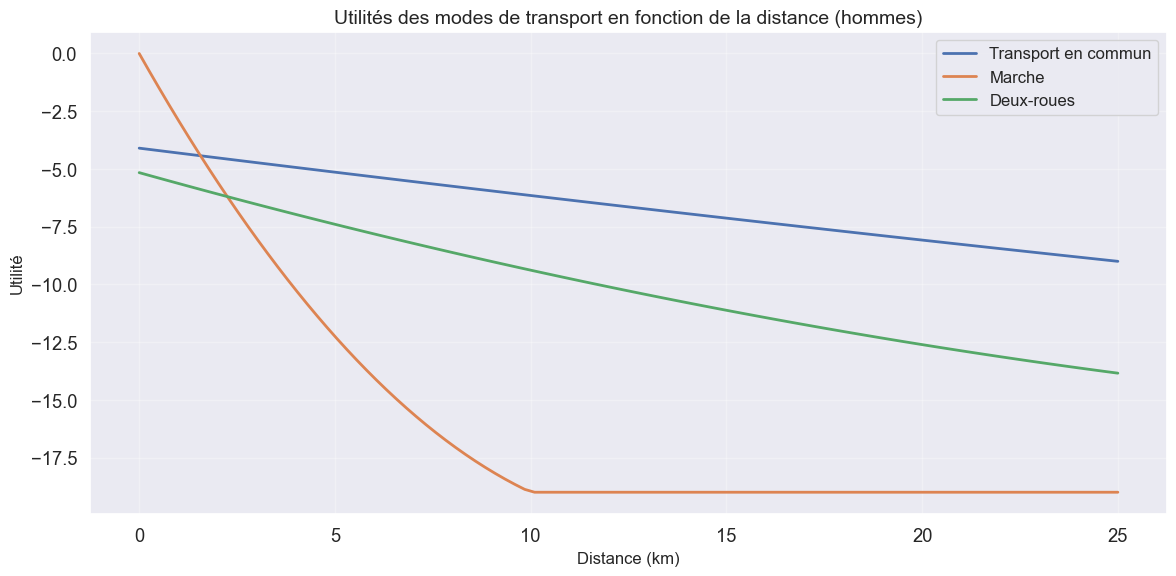

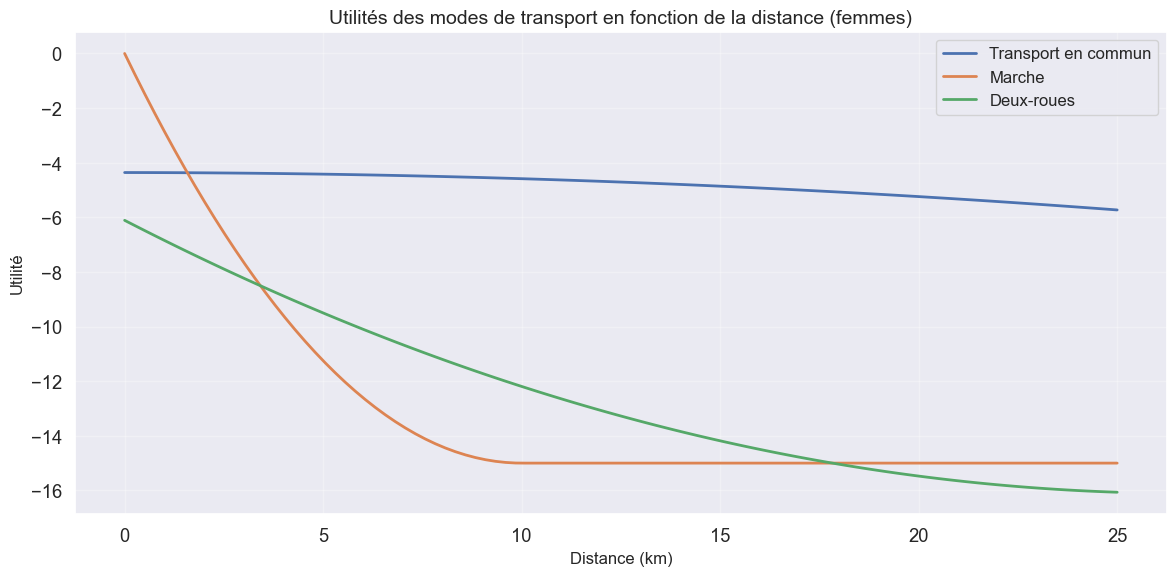

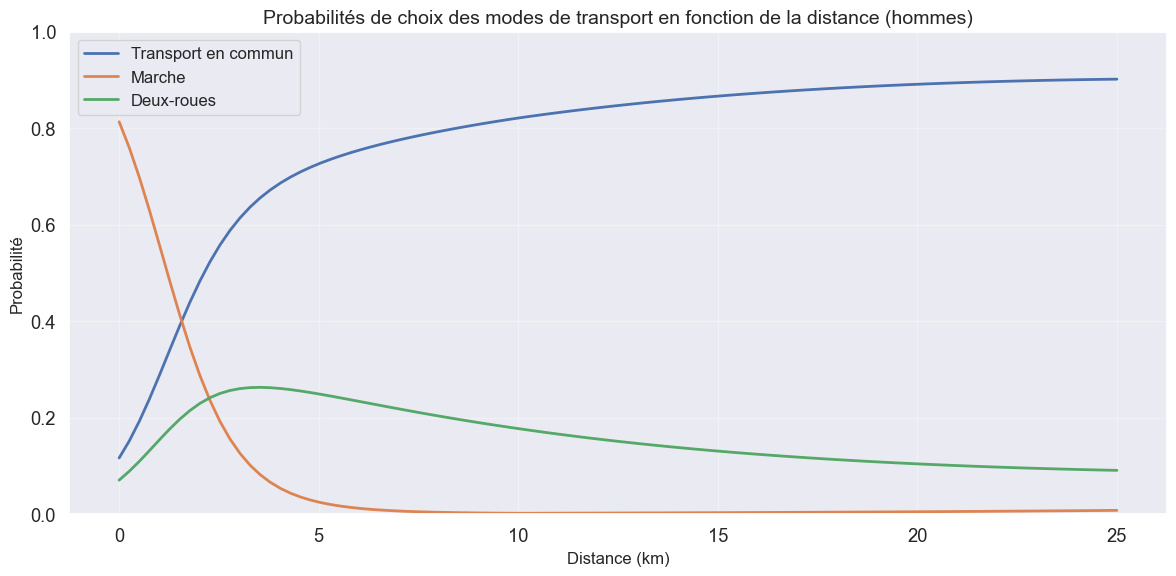

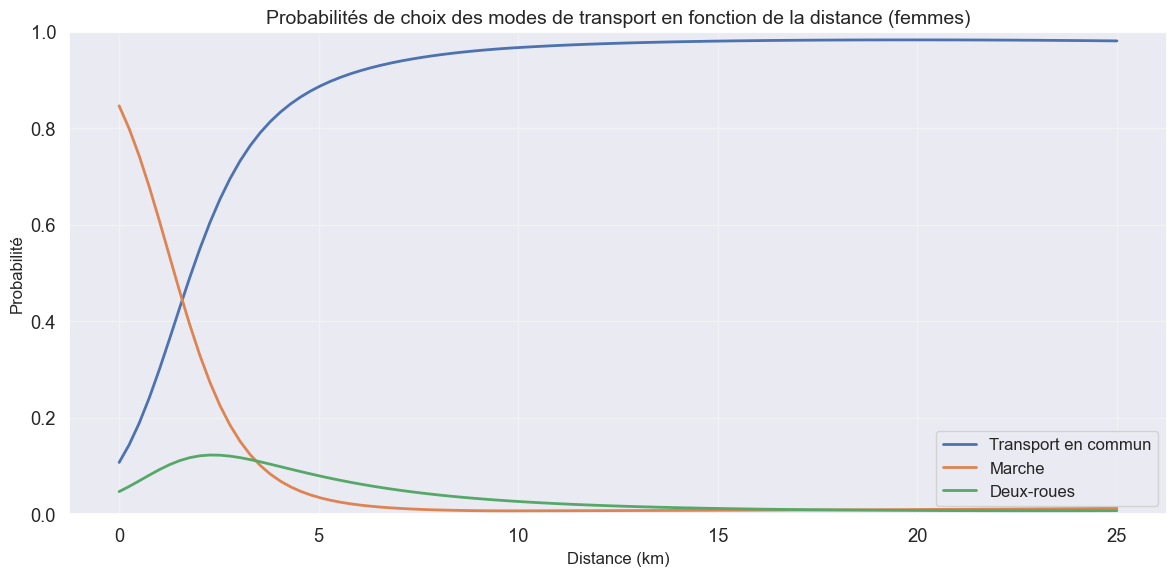

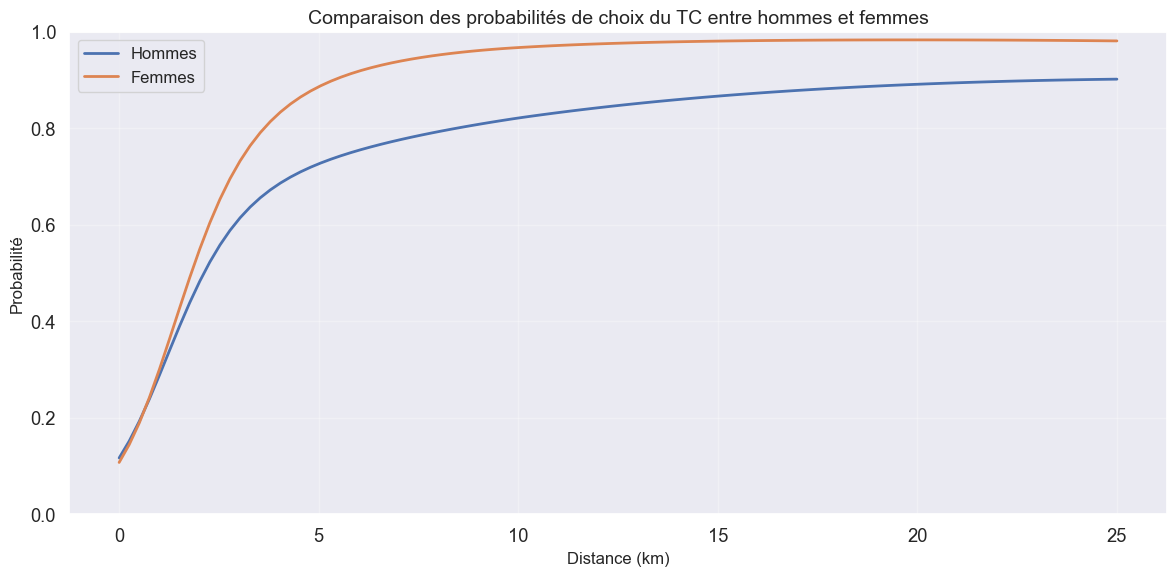

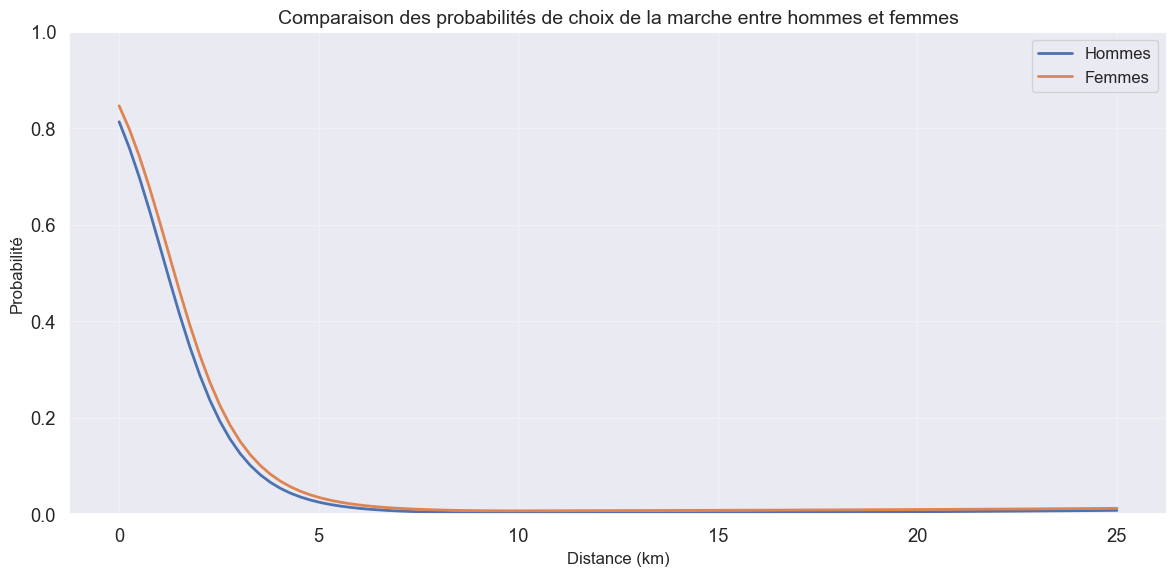

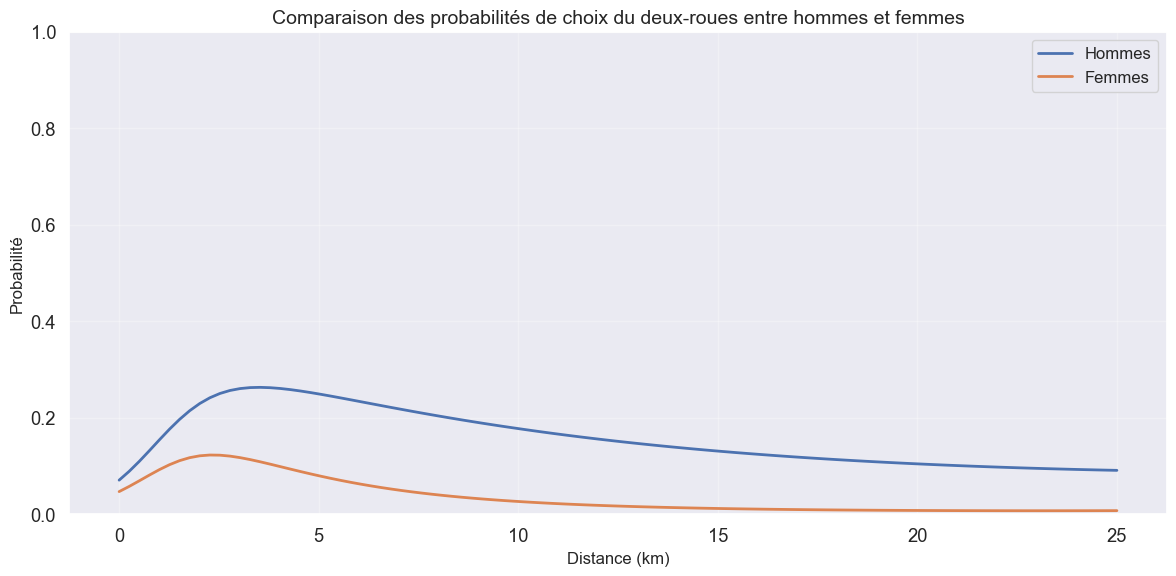

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

# Configuration du style des graphiques
plt.style.use('ggplot')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)

# Paramètres du modèle Level 0 (valeurs typiques, à remplacer par vos valeurs estimées)
# Ces valeurs sont indicatives et basées sur votre modèle - ajustez selon vos résultats
params = {
    # Hommes
    'ASC_TC_m': -4.10,  # Constante pour TC (homme)
    'ASC_2R_m': -5.16,  # Constante pour deux-roues (homme)
    'delta_TT_TC_m': 1.44,  # Coefficient exponentiel pour temps de trajet TC (homme)
    'delta_DIST_2R_m': -0.75,  # Coefficient exponentiel pour distance deux-roues (homme)
    'B_TT_TC2_m': 0.24,  # Terme quadratique temps TC (homme)
    'B_DIST_WALK2_m': 0.11,  # Terme quadratique distance marche (homme)
    'B_DIST_2R2_m': 0.005,  # Terme quadratique distance deux-roues (homme)
    
    # Femmes
    'ASC_TC_w': -4.36,  # Constante pour TC (femme)
    'ASC_2R_w': -6.11,  # Constante pour deux-roues (femme)
    'delta_TT_TC_w': -3.87,  # Coefficient exponentiel pour temps de trajet TC (femme)
    'delta_DIST_2R_w': -0.29,  # Coefficient exponentiel pour distance deux-roues (femme)
    'B_TT_TC2_w': -0.86,  # Terme quadratique temps TC (femme)
    'B_DIST_WALK2_w': 0.15,  # Terme quadratique distance marche (femme)
    'B_DIST_2R2_w': 0.014  # Terme quadratique distance deux-roues (femme)
}

# Créer une plage de distances de 0 à 25 km
distances = np.linspace(0, 25, 100)

# Fonction pour calculer les utilités
def calculate_utilities(distances, gender='m'):
    # Conversion des temps de trajet approximatifs à partir des distances
    # Hypothèses: temps en heures
    # TC: ~20 km/h
    # Marche: ~4 km/h
    # 2R: ~30 km/h
    tt_tc = distances / 20
    tt_bike = distances / 30
    
    # Hommes
    if gender == 'm':
        V_TC = params['ASC_TC_m'] - np.exp(params['delta_TT_TC_m']) * np.minimum(tt_tc, 3) + params['B_TT_TC2_m'] * (np.minimum(tt_tc, 3)**2)
        V_WALK = -3 * np.minimum(distances, 10) + params['B_DIST_WALK2_m'] * (np.minimum(distances, 10)**2)
        V_2R = params['ASC_2R_m'] - np.exp(params['delta_DIST_2R_m']) * np.minimum(distances, 25) + params['B_DIST_2R2_m'] * (np.minimum(distances, 25)**2)
    # Femmes
    else:
        V_TC = params['ASC_TC_w'] - np.exp(params['delta_TT_TC_w']) * np.minimum(tt_tc, 3) + params['B_TT_TC2_w'] * (np.minimum(tt_tc, 3)**2)
        V_WALK = -3 * np.minimum(distances, 10) + params['B_DIST_WALK2_w'] * (np.minimum(distances, 10)**2)
        V_2R = params['ASC_2R_w'] - np.exp(params['delta_DIST_2R_w']) * np.minimum(distances, 25) + params['B_DIST_2R2_w'] * (np.minimum(distances, 25)**2)
    
    return V_TC, V_WALK, V_2R

# Calculer les utilités pour hommes et femmes
V_TC_m, V_WALK_m, V_2R_m = calculate_utilities(distances, 'm')
V_TC_w, V_WALK_w, V_2R_w = calculate_utilities(distances, 'w')

# Calculer les probabilités (formule logit)
def calculate_probabilities(V_TC, V_WALK, V_2R, sigma=2.11):
    # Appliquer l'échelle sigma
    V_TC_scaled = V_TC / sigma
    V_WALK_scaled = V_WALK / sigma
    V_2R_scaled = V_2R / sigma
    
    # Calculer exp(V)
    exp_V_TC = np.exp(V_TC_scaled)
    exp_V_WALK = np.exp(V_WALK_scaled)
    exp_V_2R = np.exp(V_2R_scaled)
    
    # Somme des exp(V)
    sum_exp_V = exp_V_TC + exp_V_WALK + exp_V_2R
    
    # Probabilités
    P_TC = exp_V_TC / sum_exp_V
    P_WALK = exp_V_WALK / sum_exp_V
    P_2R = exp_V_2R / sum_exp_V
    
    return P_TC, P_WALK, P_2R

# Calculer les probabilités
P_TC_m, P_WALK_m, P_2R_m = calculate_probabilities(V_TC_m, V_WALK_m, V_2R_m)
P_TC_w, P_WALK_w, P_2R_w = calculate_probabilities(V_TC_w, V_WALK_w, V_2R_w)

# 1. Graphique des utilités en fonction de la distance (hommes)
plt.figure(figsize=(12, 6))
plt.plot(distances, V_TC_m, label='Transport en commun', linewidth=2)
plt.plot(distances, V_WALK_m, label='Marche', linewidth=2)
plt.plot(distances, V_2R_m, label='Deux-roues', linewidth=2)
plt.title('Utilités des modes de transport en fonction de la distance (hommes)', fontsize=14)
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Utilité', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('utilites_distance_hommes.png', dpi=300)
plt.show()

# 2. Graphique des utilités en fonction de la distance (femmes)
plt.figure(figsize=(12, 6))
plt.plot(distances, V_TC_w, label='Transport en commun', linewidth=2)
plt.plot(distances, V_WALK_w, label='Marche', linewidth=2)
plt.plot(distances, V_2R_w, label='Deux-roues', linewidth=2)
plt.title('Utilités des modes de transport en fonction de la distance (femmes)', fontsize=14)
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Utilité', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('utilites_distance_femmes.png', dpi=300)
plt.show()

# 3. Graphique des probabilités en fonction de la distance (hommes)
plt.figure(figsize=(12, 6))
plt.plot(distances, P_TC_m, label='Transport en commun', linewidth=2)
plt.plot(distances, P_WALK_m, label='Marche', linewidth=2)
plt.plot(distances, P_2R_m, label='Deux-roues', linewidth=2)
plt.title('Probabilités de choix des modes de transport en fonction de la distance (hommes)', fontsize=14)
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Probabilité', fontsize=12)
plt.ylim(0, 1)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('probabilites_distance_hommes.png', dpi=300)
plt.show()

# 4. Graphique des probabilités en fonction de la distance (femmes)
plt.figure(figsize=(12, 6))
plt.plot(distances, P_TC_w, label='Transport en commun', linewidth=2)
plt.plot(distances, P_WALK_w, label='Marche', linewidth=2)
plt.plot(distances, P_2R_w, label='Deux-roues', linewidth=2)
plt.title('Probabilités de choix des modes de transport en fonction de la distance (femmes)', fontsize=14)
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Probabilité', fontsize=12)
plt.ylim(0, 1)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('probabilites_distance_femmes.png', dpi=300)
plt.show()

# 5. Graphique comparatif des probabilités TC (hommes vs femmes)
plt.figure(figsize=(12, 6))
plt.plot(distances, P_TC_m, label='Hommes', linewidth=2)
plt.plot(distances, P_TC_w, label='Femmes', linewidth=2)
plt.title('Comparaison des probabilités de choix du TC entre hommes et femmes', fontsize=14)
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Probabilité', fontsize=12)
plt.ylim(0, 1)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('comparaison_tc_hommes_femmes.png', dpi=300)
plt.show()

# 6. Graphique comparatif des probabilités de marche (hommes vs femmes)
plt.figure(figsize=(12, 6))
plt.plot(distances, P_WALK_m, label='Hommes', linewidth=2)
plt.plot(distances, P_WALK_w, label='Femmes', linewidth=2)
plt.title('Comparaison des probabilités de choix de la marche entre hommes et femmes', fontsize=14)
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Probabilité', fontsize=12)
plt.ylim(0, 1)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('comparaison_marche_hommes_femmes.png', dpi=300)
plt.show()

# 7. Graphique comparatif des probabilités deux-roues (hommes vs femmes)
plt.figure(figsize=(12, 6))
plt.plot(distances, P_2R_m, label='Hommes', linewidth=2)
plt.plot(distances, P_2R_w, label='Femmes', linewidth=2)
plt.title('Comparaison des probabilités de choix du deux-roues entre hommes et femmes', fontsize=14)
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Probabilité', fontsize=12)
plt.ylim(0, 1)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('comparaison_2r_hommes_femmes.png', dpi=300)
plt.show()

# Level 1 

## Parameter names convention :

- for the parameters of the Pareto weight (Lambda) : begin with **L_**
- for the parameters of the different constants : begin with **B_**
- for the parameters of the value of time : begin with **votCA_** if the value of time of car alone, **votCP_** if car passenger, etc.
- the end of each parameter should always follow the rules of each level : so, here each parameter ends with : **_l1**

### Tips :
- Here we start by computing the *logsum* resulting from level 0. Be careful to load the right parameters to compute it \
otherwise you will end up with a wrong *logsum* term 
- This level is the **hardest to identify** : I recommand you to add variables in the Lambda, \
the constants of OTHERS (being the case of choosing other modes than car), and the VOT of car alone at the same time 
- *ASC_Cp_m_l1*, *ASC_Cp_w_l1*, *ASC_Cd_m_l1*, *ASC_Cd_w_l1* and \
*delta_Cp_m_l1*, *delta_Cp_w_l1*, *delta_Cd_m_l1*, *delta_Cd_w_l1* are the **hardest to identify**

In [25]:
from packages.utils2 import LoadParameters

In [26]:
from packages.utils2 import (
    LoadParameters,
    prepare_data_level0,
    prepare_data_level1,
    Optimize,
    SaveParameters
)

In [31]:
# Charger votre dataframe
import pandas as pd
df = df_no_intrazonal

# Ensuite définir l'année
year = 2015

In [32]:

# load the parameters of the final model in level 0 (so the last UNconstraint model that you've estimated)
loaded_parameters = LoadParameters(
                func=level0, 
                file_name='Level0_UNCONSTRAINT') 

year = 2015

# this adds the logsums of the man and the woman to the dataset
df['LS_m'], df['LS_w'] = level0(loaded_parameters, prepare_data_level0(df, year=year), logsum=True)


def level1(params, 
                  df, 
                  pytorch=False, 
                  grad=False, 
                  null_loglik=False, 
                  df_length=False,
                  pareto_weight=False,
                  logsum=False,
                  utility_nestB=False,
                  all_sample=False,
                  year=year):
        v = df["vars"]

        if all_sample:
                idx1 = df["all_idx"]
                idx2 = df["all_idx"]
        else:
                idx1 = df["is_one_car_idx"]
                idx2 = df["is_multi_car_idx"]

        def var(name): return v[name]

        if grad:
                params = params.clone().requires_grad_(True)
        else:
                params = torch.tensor(params, dtype=torch.float64)
    
        (
        sigma_1c_l1, sigma_2c_l1,

        ASC_Cp_m_l1, ASC_Cp_w_l1,
        ASC_Cd_m_l1, ASC_Cd_w_l1,

        ASC_B_w_l1, delta_Ca_w_l1, delta_Cd_w_l1, delta_Cp_w_l1,
        ASC_B_m_l1, delta_Ca_m_l1, delta_Cp_m_l1, delta_Cd_m_l1,

        ) = params

        Xb_Lambda = (torch.tensor(0))

        Lambda = 1 / (1 + torch.exp(-Xb_Lambda))

        Xb_m_OTHERS = (torch.tensor(0))
                       
        Xb_w_OTHERS = (torch.tensor(0))

        Xb_m_CP = (torch.tensor(0))

        Xb_w_CP = (torch.tensor(0))

        Xb_m_CD = (torch.tensor(0))

        Xb_w_CD = (torch.tensor(0))

        # individual vot and utilities:
        VOT_Ca_m = torch.exp(delta_Ca_m_l1)
        
        VOT_Ca_w = torch.exp(delta_Ca_w_l1)

        V_Ca_m = -VOT_Ca_m*var('TT_VP_m')
        V_Ca_w = -VOT_Ca_w*var('TT_VP_w')

        V_Cp_m = (ASC_Cp_m_l1 + Xb_m_CP) - VOT_Ca_m*torch.exp(delta_Cp_m_l1)*var('TT_VP_m') 
        V_Cp_w = (ASC_Cp_w_l1 + Xb_w_CP) - VOT_Ca_w*torch.exp(delta_Cp_w_l1)*var('TT_VP_w') 

        V_Cd_m = (ASC_Cd_m_l1 + Xb_m_CD) - VOT_Ca_m*torch.exp(delta_Cd_m_l1)*var('TT_VP_w') - VOT_Ca_m*var('WOMANtowardsMAN')
        V_Cd_w = (ASC_Cd_w_l1 + Xb_w_CD) - VOT_Ca_w*torch.exp(delta_Cd_w_l1)*var('TT_VP_m') - VOT_Ca_w*var('MANtowardsWOMAN')

        V_B_m = (ASC_B_m_l1 + Xb_m_OTHERS) + var('LS_m')
        V_B_w = (ASC_B_w_l1 + Xb_w_OTHERS) + var('LS_w')

        # Utilitaires collectifs : (extrait)
        V_CaCa = Lambda * V_Ca_w + (1 - Lambda) * V_Ca_m
        V_BB = Lambda * V_B_w + (1 - Lambda) * V_B_m
        V_CaB = Lambda * V_Ca_w + (1 - Lambda) * V_B_m
        V_BCa = Lambda * V_B_w + (1 - Lambda) * V_Ca_m
        V_CdCp = Lambda * V_Cd_w + (1 - Lambda) * V_Cp_m
        V_CpCd = Lambda * V_Cp_w + (1 - Lambda) * V_Cd_m

        # -------- One-car probabilities
        V_1c_stack = torch.stack([
                V_BB[idx1] / sigma_1c_l1,
                V_CaB[idx1] / sigma_1c_l1,
                V_BCa[idx1] / sigma_1c_l1,
                V_CdCp[idx1] / sigma_1c_l1,
                V_CpCd[idx1] / sigma_1c_l1
        ], dim=1)
        max_V_1c = V_1c_stack.max()
        exp_V_1c = torch.exp(V_1c_stack - max_V_1c)
        sum_exp_1c = exp_V_1c.sum(dim=1)

        P_BB_1c, P_CaB_1c, P_BCa_1c, P_CdCp_1c, P_CpCd_1c = exp_V_1c.T / sum_exp_1c

        # -------- Two-car probabilities
        V_2c_stack = torch.stack([
                V_CaCa[idx2] / sigma_2c_l1,
                V_BB[idx2] / sigma_2c_l1,
                V_CaB[idx2] / sigma_2c_l1,
                V_BCa[idx2] / sigma_2c_l1,
                V_CdCp[idx2] / sigma_2c_l1,
                V_CpCd[idx2] / sigma_2c_l1
        ], dim=1)
        max_V_2c = V_2c_stack.max()
        exp_V_2c = torch.exp(V_2c_stack - max_V_2c)
        sum_exp_2c = exp_V_2c.sum(dim=1)

        P_CaCa_2c, P_BB_2c, P_CaB_2c, P_BCa_2c, P_CdCp_2c, P_CpCd_2c = exp_V_2c.T / sum_exp_2c

        # -------- Choices
        choices = df['df']

        if year>2016:
                Choice_CC = ((choices['TRANS_w'] == 5) & (choices['TRANS_m'] == 5)).to_numpy().astype(float)
                Choice_BB = ((choices['TRANS_w'].isin([2, 3, 4, 6])) & (choices['TRANS_m'].isin([2, 3, 4, 6]))).to_numpy().astype(float)
                Choice_CaB = ((choices['TRANS_w'] == 5) & (choices['TRANS_m'].isin([2, 3, 4, 6]))).to_numpy().astype(float)
                Choice_BCa = ((choices['TRANS_w'].isin([2, 3, 4, 6])) & (choices['TRANS_m'] == 5)).to_numpy().astype(float)
        else:
                Choice_CC = ((choices['TRANS_w'] == 4) & (choices['TRANS_m'] == 4)).to_numpy().astype(float)
                Choice_BB = ((choices['TRANS_w'].isin([2, 3, 5])) & (choices['TRANS_m'].isin([2, 3, 5]))).to_numpy().astype(float)
                Choice_CaB = ((choices['TRANS_w'] == 4) & (choices['TRANS_m'].isin([2, 3, 5]))).to_numpy().astype(float)
                Choice_BCa = ((choices['TRANS_w'].isin([2, 3, 5])) & (choices['TRANS_m'] == 4)).to_numpy().astype(float)


        w_1c = var('WEIGHT_hh')
        w_1c = w_1c[idx1]
        w_2c = var('WEIGHT_hh')
        w_2c = w_2c[idx2]

        epsilon = 1e-30

        LL_1c = (
        torch.sum(w_1c * torch.tensor(Choice_CC)[idx1] * torch.log(torch.clamp(P_CdCp_1c + P_CpCd_1c, min=epsilon))) +
        torch.sum(w_1c * torch.tensor(Choice_BB)[idx1] * torch.log(torch.clamp(P_BB_1c, min=epsilon))) +
        torch.sum(w_1c * torch.tensor(Choice_CaB)[idx1] * torch.log(torch.clamp(P_CaB_1c, min=epsilon))) +
        torch.sum(w_1c * torch.tensor(Choice_BCa)[idx1] * torch.log(torch.clamp(P_BCa_1c, min=epsilon)))
        )

        LL_2c = (
        torch.sum(w_2c * torch.tensor(Choice_CC)[idx2] * torch.log(torch.clamp(P_CaCa_2c + P_CdCp_2c + P_CpCd_2c, min=epsilon))) +
        torch.sum(w_2c * torch.tensor(Choice_BB)[idx2] * torch.log(torch.clamp(P_BB_2c, min=epsilon))) +
        torch.sum(w_2c * torch.tensor(Choice_CaB)[idx2] * torch.log(torch.clamp(P_CaB_2c, min=epsilon))) +
        torch.sum(w_2c * torch.tensor(Choice_BCa)[idx2] * torch.log(torch.clamp(P_BCa_2c, min=epsilon)))
        )

        if pytorch:
                return -(LL_1c + LL_2c)
        if df_length:
                return len(V_B_w)
        
        if not pytorch and null_loglik:
                n_1c = len(idx1)
                n_2c = len(idx2)

                if year>2016:
                        Choice_CC = torch.tensor(((choices['TRANS_w'] == 5) & (choices['TRANS_m'] == 5)).astype(float).values)
                        Choice_BB = torch.tensor(((choices['TRANS_w'].isin([2, 3, 4, 6])) & (choices['TRANS_m'].isin([2, 3, 4, 6]))).astype(float).values)
                        Choice_CaB = torch.tensor(((choices['TRANS_w'] == 5) & (choices['TRANS_m'].isin([2, 3, 4, 6]))).astype(float).values)
                        Choice_BCa = torch.tensor(((choices['TRANS_w'].isin([2, 3, 4, 6])) & (choices['TRANS_m'] == 5)).astype(float).values)
                else:
                        Choice_CC = torch.tensor(((choices['TRANS_w'] == 4) & (choices['TRANS_m'] == 4 )).astype(float).values)
                        Choice_BB = torch.tensor(((choices['TRANS_w'].isin([2, 3, 5])) & (choices['TRANS_m'].isin([2, 3, 5]))).astype(float).values)
                        Choice_CaB = torch.tensor(((choices['TRANS_w'] == 4) & (choices['TRANS_m'].isin([2, 3, 5]))).astype(float).values)
                        Choice_BCa = torch.tensor(((choices['TRANS_w'].isin([2, 3, 5])) & (choices['TRANS_m'] == 4)).astype(float).values)

                Choice_CC_1c, Choice_BB_1c, Choice_CaB_1c, Choice_BCa_1c = (
                Choice_CC[idx1], Choice_BB[idx1], Choice_CaB[idx1], Choice_BCa[idx1])
                Choice_CC_2c, Choice_BB_2c, Choice_CaB_2c, Choice_BCa_2c = (
                Choice_CC[idx2], Choice_BB[idx2], Choice_CaB[idx2], Choice_BCa[idx2])

                # observed shares
                share_CC_1c = torch.sum(Choice_CC_1c) / n_1c
                share_BB_1c = torch.sum(Choice_BB_1c) / n_1c
                share_CaB_1c = torch.sum(Choice_CaB_1c) / n_1c
                share_BCa_1c = torch.sum(Choice_BCa_1c) / n_1c

                share_CC_2c = torch.sum(Choice_CC_2c) / n_2c
                share_BB_2c = torch.sum(Choice_BB_2c) / n_2c
                share_CaB_2c = torch.sum(Choice_CaB_2c) / n_2c
                share_BCa_2c = torch.sum(Choice_BCa_2c) / n_2c

                w_1c = var('WEIGHT_hh')
                w_1c = w_1c[idx1]
                w_2c = var('WEIGHT_hh')
                w_2c = w_2c[idx2]

                null_LL_1c = (
                torch.sum(w_1c * Choice_CC_1c * torch.log(torch.clamp(share_CC_1c, min=epsilon))) +
                torch.sum(w_1c * Choice_BB_1c * torch.log(torch.clamp(share_BB_1c, min=epsilon))) +
                torch.sum(w_1c * Choice_CaB_1c * torch.log(torch.clamp(share_CaB_1c, min=epsilon))) +
                torch.sum(w_1c * Choice_BCa_1c * torch.log(torch.clamp(share_BCa_1c, min=epsilon)))
                )

                null_LL_2c = (
                torch.sum(w_2c * Choice_CC_2c * torch.log(torch.clamp(share_CC_2c, min=epsilon))) +
                torch.sum(w_2c * Choice_BB_2c * torch.log(torch.clamp(share_BB_2c, min=epsilon))) +
                torch.sum(w_2c * Choice_CaB_2c * torch.log(torch.clamp(share_CaB_2c, min=epsilon))) +
                torch.sum(w_2c * Choice_BCa_2c * torch.log(torch.clamp(share_BCa_2c, min=epsilon)))
                )

                return -(null_LL_1c + null_LL_2c)
        
        if pareto_weight:
                return Lambda
        
        if logsum:
                LS_1c = sigma_1c_l1 * torch.log(
                        torch.exp(V_BB/sigma_1c_l1) + torch.exp(V_CaB/sigma_1c_l1) 
                        + torch.exp(V_BCa/sigma_1c_l1) + torch.exp(V_CpCd/sigma_1c_l1) + torch.exp(V_CdCp/sigma_1c_l1)
                )
                LS_2c = sigma_2c_l1 * torch.log(
                        torch.exp(V_CaCa/sigma_2c_l1) + torch.exp(V_BB/sigma_2c_l1) + torch.exp(V_CaB/sigma_2c_l1) 
                        + torch.exp(V_BCa/sigma_2c_l1) + torch.exp(V_CpCd/sigma_2c_l1) + torch.exp(V_CdCp/sigma_2c_l1)
                )
                return (LS_1c).detach().numpy(), (LS_2c).detach().numpy()
        if utility_nestB:
                return V_BB.detach().numpy()
        
        return -(LL_1c + LL_2c).detach().numpy()

KeyError: 'WEIGHT_m'

In [24]:
summary_level1, parameters_level1 = Optimize(level1, 
         prepare_data_level1(df), 
        #  initial_values='Level1_CONSTRAINT',
         max_iter=5000,
         gtol=1,
         display_results=True)

Optimizing:   3%|▎         | 173/5000 [00:23<10:51,  7.41it/s, Objective Value=189467.85227]

Convergence: True


Optimizing:   3%|▎         | 173/5000 [00:24<11:31,  6.98it/s, Objective Value=189467.85227]


In [24]:
SaveParameters(level1,
               parameters_level1,
               excel=True,
               data=prepare_data_level1(df),
               file_name='Level1_CONSTRAINT')

In [21]:
def level1(params, 
           df, 
           pytorch=False, 
           grad=False, 
           null_loglik=False, 
           df_length=False,
           pareto_weight=False,
           logsum=False,
           utility_nestB=False,
           all_sample=False,
           year=year):
    
    # Vérification du nombre de paramètres au début de la fonction
    if len(params) > 31:
        print(f"Attention: Troncature des paramètres de {len(params)} à 31")
        params = params[:31]  # Tronquer aux 31 premiers paramètres
    
    v = df["vars"]

    if all_sample:
        idx1 = df["all_idx"]
        idx2 = df["all_idx"]
    else:
        idx1 = df["is_one_car_idx"]
        idx2 = df["is_multi_car_idx"]

    # Fonction modifiée pour gérer les variables manquantes
    def var(name):
        if name in v:
            return v[name]
        else:
            print(f"Attention: Variable '{name}' non trouvée, utilisation de zéros")
            # Créer un tenseur de zéros avec la même taille que les autres variables (ex: LS_m)
            if 'LS_m' in v:
                return torch.zeros_like(v['LS_m'])
            else:
                # Si aucune variable de référence n'est disponible, utiliser la longueur du DataFrame
                return torch.zeros(len(df["df"]), dtype=torch.float64)

    if grad:
        params = params.clone().requires_grad_(True)
    else:
        params = torch.tensor(params, dtype=torch.float64)
    
    (
    sigma_1c_l1, sigma_2c_l1,

    ASC_Cp_m_l1, ASC_Cp_w_l1,
    ASC_Cd_m_l1, ASC_Cd_w_l1,

    ASC_B_w_l1, delta_Ca_w_l1, delta_Cd_w_l1, delta_Cp_w_l1,
    ASC_B_m_l1, delta_Ca_m_l1, delta_Cp_m_l1, delta_Cd_m_l1,

    # Nouveaux paramètres sociodémographiques
    beta_FULLTIME_m, beta_FULLTIME_w,
    beta_CHILDREN_m, beta_CHILDREN_w,
    beta_DIPL_m, beta_DIPL_w,
    beta_MANmoreEDU_m, beta_WOMANmoreEDU_w, beta_SameEDU,
    
    # Paramètres spécifiques aux modes
    beta_FULLTIME_CP_m, beta_FULLTIME_CP_w,
    beta_FULLTIME_CD_m, beta_FULLTIME_CD_w,
    
    beta_CHILDREN_CP_m, beta_CHILDREN_CP_w,
    beta_CHILDREN_CD_m, beta_CHILDREN_CD_w,
    
    ) = params

    Xb_Lambda = (torch.tensor(0))
    Lambda = 1 / (1 + torch.exp(-Xb_Lambda))

    # Utilisation des variables disponibles
    Xb_m_OTHERS = (
        beta_FULLTIME_m * var('EMPL_m') +  # Statut d'emploi au lieu de FULL_TIME_m
        beta_DIPL_m * var('ETUD_m') +      # Niveau d'éducation au lieu de DIPL_m
        beta_MANmoreEDU_m * var('OCCP_WHITE_COLLAR_m') +  # Type d'emploi au lieu de MANmoreEDU
        beta_SameEDU * var('TRANS_m')      # Mode de transport utilisé comme proxy
    )
                   
    Xb_w_OTHERS = (
        beta_FULLTIME_w * var('WEIGHT_w') +  # Utiliser une variable disponible
        beta_DIPL_w * var('WEIGHT_w') +      # Utiliser une variable disponible
        beta_WOMANmoreEDU_w * var('WEIGHT_w') +  # Utiliser une variable disponible
        beta_SameEDU * var('LS_w')           # Utiliser LS_w qui est disponible
    )

    # Simplification des termes spécifiques aux modes
    Xb_m_CP = beta_FULLTIME_CP_m * var('EMPL_m')  # Utiliser EMPL_m
    Xb_w_CP = beta_FULLTIME_CP_w * var('WEIGHT_w')  # Utiliser WEIGHT_w disponible

    Xb_m_CD = beta_FULLTIME_CD_m * var('EMPL_m')  # Utiliser EMPL_m
    Xb_w_CD = beta_FULLTIME_CD_w * var('WEIGHT_w')  # Utiliser WEIGHT_w disponible

    # Le reste de la fonction reste similaire
    VOT_Ca_m = torch.exp(delta_Ca_m_l1)
    VOT_Ca_w = torch.exp(delta_Ca_w_l1)

    V_Ca_m = -VOT_Ca_m*var('TT_VP_m')  # Conserver si TT_VP_m existe
    V_Ca_w = -VOT_Ca_w*var('TT_VP_w')  # Conserver si TT_VP_w existe

    V_Cp_m = (ASC_Cp_m_l1 + Xb_m_CP) - VOT_Ca_m*torch.exp(delta_Cp_m_l1)*var('TT_VP_m') 
    V_Cp_w = (ASC_Cp_w_l1 + Xb_w_CP) - VOT_Ca_w*torch.exp(delta_Cp_w_l1)*var('TT_VP_w') 

    # Adapté pour utiliser WEIGHT_m/w au lieu de MANtowardsWOMAN/WOMANtowardsMAN
    V_Cd_m = (ASC_Cd_m_l1 + Xb_m_CD) - VOT_Ca_m*torch.exp(delta_Cd_m_l1)*var('TT_VP_w') - VOT_Ca_m*var('WEIGHT_w')
    V_Cd_w = (ASC_Cd_w_l1 + Xb_w_CD) - VOT_Ca_w*torch.exp(delta_Cd_w_l1)*var('TT_VP_m') - VOT_Ca_w*var('WEIGHT_m')

    V_B_m = (ASC_B_m_l1 + Xb_m_OTHERS) + var('LS_m')  # LS_m est disponible
    V_B_w = (ASC_B_w_l1 + Xb_w_OTHERS) + var('LS_w')  # LS_w est disponible

    # Utilitaires collectifs :
    V_CaCa = Lambda * V_Ca_w + (1 - Lambda) * V_Ca_m
    V_BB = Lambda * V_B_w + (1 - Lambda) * V_B_m
    V_CaB = Lambda * V_Ca_w + (1 - Lambda) * V_B_m
    V_BCa = Lambda * V_B_w + (1 - Lambda) * V_Ca_m
    V_CdCp = Lambda * V_Cd_w + (1 - Lambda) * V_Cp_m
    V_CpCd = Lambda * V_Cp_w + (1 - Lambda) * V_Cd_m

    # -------- One-car probabilities
    V_1c_stack = torch.stack([
            V_BB[idx1] / sigma_1c_l1,
            V_CaB[idx1] / sigma_1c_l1,
            V_BCa[idx1] / sigma_1c_l1,
            V_CdCp[idx1] / sigma_1c_l1,
            V_CpCd[idx1] / sigma_1c_l1
    ], dim=1)
    max_V_1c = V_1c_stack.max()
    exp_V_1c = torch.exp(V_1c_stack - max_V_1c)
    sum_exp_1c = exp_V_1c.sum(dim=1)

    P_BB_1c, P_CaB_1c, P_BCa_1c, P_CdCp_1c, P_CpCd_1c = exp_V_1c.T / sum_exp_1c

    # -------- Two-car probabilities
    V_2c_stack = torch.stack([
            V_CaCa[idx2] / sigma_2c_l1,
            V_BB[idx2] / sigma_2c_l1,
            V_CaB[idx2] / sigma_2c_l1,
            V_BCa[idx2] / sigma_2c_l1,
            V_CdCp[idx2] / sigma_2c_l1,
            V_CpCd[idx2] / sigma_2c_l1
    ], dim=1)
    max_V_2c = V_2c_stack.max()
    exp_V_2c = torch.exp(V_2c_stack - max_V_2c)
    sum_exp_2c = exp_V_2c.sum(dim=1)

    P_CaCa_2c, P_BB_2c, P_CaB_2c, P_BCa_2c, P_CdCp_2c, P_CpCd_2c = exp_V_2c.T / sum_exp_2c

    # -------- Choices
    choices = df['df']

    if year>2016:
            Choice_CC = ((choices['TRANS_w'] == 5) & (choices['TRANS_m'] == 5)).to_numpy().astype(float)
            Choice_BB = ((choices['TRANS_w'].isin([2, 3, 4, 6])) & (choices['TRANS_m'].isin([2, 3, 4, 6]))).to_numpy().astype(float)
            Choice_CaB = ((choices['TRANS_w'] == 5) & (choices['TRANS_m'].isin([2, 3, 4, 6]))).to_numpy().astype(float)
            Choice_BCa = ((choices['TRANS_w'].isin([2, 3, 4, 6])) & (choices['TRANS_m'] == 5)).to_numpy().astype(float)
    else:
            Choice_CC = ((choices['TRANS_w'] == 4) & (choices['TRANS_m'] == 4)).to_numpy().astype(float)
            Choice_BB = ((choices['TRANS_w'].isin([2, 3, 5])) & (choices['TRANS_m'].isin([2, 3, 5]))).to_numpy().astype(float)
            Choice_CaB = ((choices['TRANS_w'] == 4) & (choices['TRANS_m'].isin([2, 3, 5]))).to_numpy().astype(float)
            Choice_BCa = ((choices['TRANS_w'].isin([2, 3, 5])) & (choices['TRANS_m'] == 4)).to_numpy().astype(float)


    w_1c = var('WEIGHT_hh')
    w_1c = w_1c[idx1]
    w_2c = var('WEIGHT_hh')
    w_2c = w_2c[idx2]

    epsilon = 1e-30

    LL_1c = (
    torch.sum(w_1c * torch.tensor(Choice_CC)[idx1] * torch.log(torch.clamp(P_CdCp_1c + P_CpCd_1c, min=epsilon))) +
    torch.sum(w_1c * torch.tensor(Choice_BB)[idx1] * torch.log(torch.clamp(P_BB_1c, min=epsilon))) +
    torch.sum(w_1c * torch.tensor(Choice_CaB)[idx1] * torch.log(torch.clamp(P_CaB_1c, min=epsilon))) +
    torch.sum(w_1c * torch.tensor(Choice_BCa)[idx1] * torch.log(torch.clamp(P_BCa_1c, min=epsilon)))
    )

    LL_2c = (
    torch.sum(w_2c * torch.tensor(Choice_CC)[idx2] * torch.log(torch.clamp(P_CaCa_2c + P_CdCp_2c + P_CpCd_2c, min=epsilon))) +
    torch.sum(w_2c * torch.tensor(Choice_BB)[idx2] * torch.log(torch.clamp(P_BB_2c, min=epsilon))) +
    torch.sum(w_2c * torch.tensor(Choice_CaB)[idx2] * torch.log(torch.clamp(P_CaB_2c, min=epsilon))) +
    torch.sum(w_2c * torch.tensor(Choice_BCa)[idx2] * torch.log(torch.clamp(P_BCa_2c, min=epsilon)))
    )

    if pytorch:
            return -(LL_1c + LL_2c)
    if df_length:
            return len(V_B_w)
    
    if not pytorch and null_loglik:
            n_1c = len(idx1)
            n_2c = len(idx2)

            if year>2016:
                    Choice_CC = torch.tensor(((choices['TRANS_w'] == 5) & (choices['TRANS_m'] == 5)).astype(float).values)
                    Choice_BB = torch.tensor(((choices['TRANS_w'].isin([2, 3, 4, 6])) & (choices['TRANS_m'].isin([2, 3, 4, 6]))).astype(float).values)
                    Choice_CaB = torch.tensor(((choices['TRANS_w'] == 5) & (choices['TRANS_m'].isin([2, 3, 4, 6]))).astype(float).values)
                    Choice_BCa = torch.tensor(((choices['TRANS_w'].isin([2, 3, 4, 6])) & (choices['TRANS_m'] == 5)).astype(float).values)
            else:
                    Choice_CC = torch.tensor(((choices['TRANS_w'] == 4) & (choices['TRANS_m'] == 4 )).astype(float).values)
                    Choice_BB = torch.tensor(((choices['TRANS_w'].isin([2, 3, 5])) & (choices['TRANS_m'].isin([2, 3, 5]))).astype(float).values)
                    Choice_CaB = torch.tensor(((choices['TRANS_w'] == 4) & (choices['TRANS_m'].isin([2, 3, 5]))).astype(float).values)
                    Choice_BCa = torch.tensor(((choices['TRANS_w'].isin([2, 3, 5])) & (choices['TRANS_m'] == 4)).astype(float).values)

            Choice_CC_1c, Choice_BB_1c, Choice_CaB_1c, Choice_BCa_1c = (
            Choice_CC[idx1], Choice_BB[idx1], Choice_CaB[idx1], Choice_BCa[idx1])
            Choice_CC_2c, Choice_BB_2c, Choice_CaB_2c, Choice_BCa_2c = (
            Choice_CC[idx2], Choice_BB[idx2], Choice_CaB[idx2], Choice_BCa[idx2])

            # observed shares
            share_CC_1c = torch.sum(Choice_CC_1c) / n_1c
            share_BB_1c = torch.sum(Choice_BB_1c) / n_1c
            share_CaB_1c = torch.sum(Choice_CaB_1c) / n_1c
            share_BCa_1c = torch.sum(Choice_BCa_1c) / n_1c

            share_CC_2c = torch.sum(Choice_CC_2c) / n_2c
            share_BB_2c = torch.sum(Choice_BB_2c) / n_2c
            share_CaB_2c = torch.sum(Choice_CaB_2c) / n_2c
            share_BCa_2c = torch.sum(Choice_BCa_2c) / n_2c

            w_1c = var('WEIGHT_hh')
            w_1c = w_1c[idx1]
            w_2c = var('WEIGHT_hh')
            w_2c = w_2c[idx2]

            null_LL_1c = (
            torch.sum(w_1c * Choice_CC_1c * torch.log(torch.clamp(share_CC_1c, min=epsilon))) +
            torch.sum(w_1c * Choice_BB_1c * torch.log(torch.clamp(share_BB_1c, min=epsilon))) +
            torch.sum(w_1c * Choice_CaB_1c * torch.log(torch.clamp(share_CaB_1c, min=epsilon))) +
            torch.sum(w_1c * Choice_BCa_1c * torch.log(torch.clamp(share_BCa_1c, min=epsilon)))
            )

            null_LL_2c = (
            torch.sum(w_2c * Choice_CC_2c * torch.log(torch.clamp(share_CC_2c, min=epsilon))) +
            torch.sum(w_2c * Choice_BB_2c * torch.log(torch.clamp(share_BB_2c, min=epsilon))) +
            torch.sum(w_2c * Choice_CaB_2c * torch.log(torch.clamp(share_CaB_2c, min=epsilon))) +
            torch.sum(w_2c * Choice_BCa_2c * torch.log(torch.clamp(share_BCa_2c, min=epsilon)))
            )

            return -(null_LL_1c + null_LL_2c)
    
    if pareto_weight:
            return Lambda.detach().numpy
    
    if logsum:
            LS_1c = sigma_1c_l1 * torch.log(
                    torch.exp(V_BB/sigma_1c_l1) + torch.exp(V_CaB/sigma_1c_l1) 
                    + torch.exp(V_BCa/sigma_1c_l1) + torch.exp(V_CpCd/sigma_1c_l1) + torch.exp(V_CdCp/sigma_1c_l1)
            )
            LS_2c = sigma_2c_l1 * torch.log(
                    torch.exp(V_CaCa/sigma_2c_l1) + torch.exp(V_BB/sigma_2c_l1) + torch.exp(V_CaB/sigma_2c_l1) 
                    + torch.exp(V_BCa/sigma_2c_l1) + torch.exp(V_CpCd/sigma_2c_l1) + torch.exp(V_CdCp/sigma_2c_l1)
            )
            return (LS_1c).detach().numpy(), (LS_2c).detach().numpy()
    if utility_nestB:
            return V_BB.detach().numpy()
    
    return -(LL_1c + LL_2c).detach().numpy()

NameError: name 'year' is not defined

In [26]:
# Appel standard
summary_level1, parameters_level1 = Optimize(level1,
    prepare_data_level1(df),
    initial_values='Level1_CONSTRAINT',
    max_iter=5000,
    gtol=1,
    display_results=True)

Optimizing:   4%|▍         | 209/5000 [00:30<13:04,  6.11it/s, Objective Value=176361.36144]

Convergence: True


Optimizing:   4%|▍         | 209/5000 [00:34<13:21,  5.98it/s, Objective Value=176361.36144]


In [37]:
SaveParameters(level1,
               parameters_level1,
               excel=True,
               data=prepare_data_level1(df),
               file_name='Level1_UNCONSTRAINT')

In [34]:
# Version ultra-simple
def check_variables(df):
    variables = list(df["vars"].keys())
    print(f"Variables disponibles ({len(variables)}):")
    for var in variables:
        print(f"- {var}")
    return variables

available_vars = check_variables(prepare_data_level1(df))

Variables disponibles (118):
- AGED_m
- COUPLE_m
- CS1_m
- EMPL_m
- ETUD_m
- ILETUD_m
- ILT_m
- IMMI_m
- INAI_m
- INATC_m
- IPONDI_m
- LPRM_m
- MOCO_m
- MODV_m
- NAIDT_m
- ORIDT_m
- SEXE_m
- STATR_m
- TACT_m
- TP_m
- TRANS_m
- OCCP_SELF_EMPLOYED_m
- OCCP_BLUE_COLLAR_m
- OCCP_WHITE_COLLAR_m
- OCCP_PROFESSIONAL_m
- OCCP_EMPLOYEE_m
- WP_INNERRING_m
- WP_OUTERRING_m
- WP_PARIS_m
- TT_VP_m
- TT_TC_m
- FREEFLOW_TT_m
- DISTANCE_m
- FULL_TIME_m
- FOREIGN_m
- AGED_w
- COUPLE_w
- CS1_w
- EMPL_w
- ETUD_w
- ILETUD_w
- ILT_w
- IMMI_w
- INAI_w
- INATC_w
- IPONDI_w
- LPRM_w
- MOCO_w
- MODV_w
- NAIDT_w
- ORIDT_w
- SEXE_w
- STATR_w
- TACT_w
- TP_w
- TRANS_w
- OCCP_SELF_EMPLOYED_w
- OCCP_BLUE_COLLAR_w
- OCCP_WHITE_COLLAR_w
- OCCP_PROFESSIONAL_w
- OCCP_EMPLOYEE_w
- WP_INNERRING_w
- WP_OUTERRING_w
- WP_PARIS_w
- TT_VP_w
- TT_TC_w
- FREEFLOW_TT_w
- DISTANCE_w
- FULL_TIME_w
- FOREIGN_w
- NUMMI
- CATL
- CATPC
- GARL
- HLML
- INPER
- NBPI
- NPERR
- SFM
- SURF
- TRIRIS
- TYPL
- TYPMC
- TYPMR
- VOIT
- BOTH_FORE

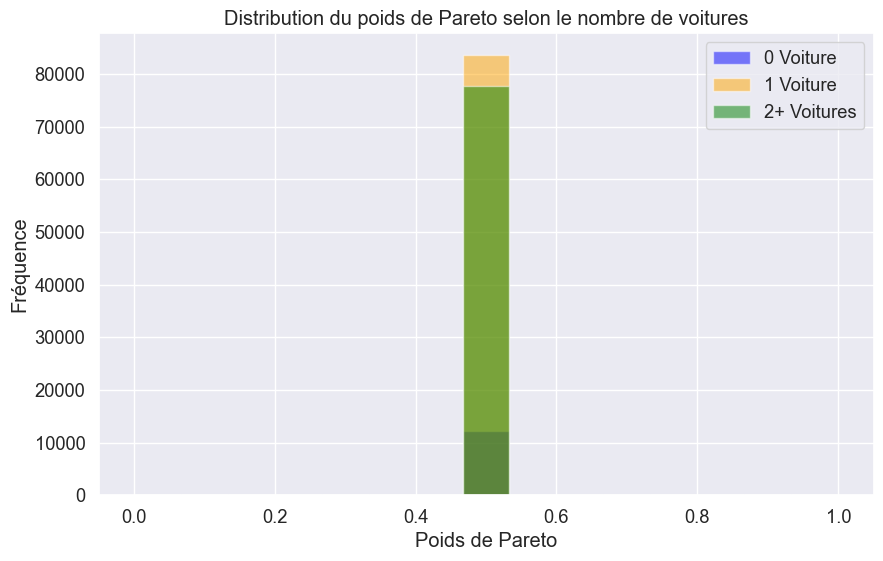

In [32]:
def calculate_pareto_weights(params, df):
    # Cette fonction calcule uniquement les poids de Pareto (Lambda)
    # Extraire les paramètres pertinents
    # Les paramètres des termes de Lambda sont généralement en début de liste
    
    # Version très simplifiée pour extraire Lambda
    Xb_Lambda = torch.tensor(0)  # Assumant que Lambda n'a pas de termes d'hétérogénéité
    Lambda = 1 / (1 + torch.exp(-Xb_Lambda))
    
    return Lambda.detach().numpy()

# Exécution
loaded_parameters = LoadParameters(func=level1, file_name='Level1_UNCONSTRAINT')
lambda_values = calculate_pareto_weights(loaded_parameters, df)

# Créer un DataFrame pour l'analyse
pareto_df = pd.DataFrame({
    'Lambda': lambda_values,
    'VOIT': df['VOIT']
})

# Graphique des distributions par nombre de voitures
plt.figure(figsize=(10, 6))

# Grouper par nombre de voitures
for cars, label, color in zip([0, 1, 2], 
                            ["0 Voiture", "1 Voiture", "2+ Voitures"],
                            ['blue', 'orange', 'green']):
    if cars < 2:
        group_data = pareto_df[pareto_df['VOIT'] == cars]['Lambda']
    else:
        group_data = pareto_df[pareto_df['VOIT'] >= cars]['Lambda']
    
    if len(group_data) > 0:
        plt.hist(group_data, bins=15, alpha=0.5, label=label, color=color)

plt.legend()
plt.title('Distribution du poids de Pareto selon le nombre de voitures')
plt.xlabel('Poids de Pareto')
plt.ylabel('Fréquence')
plt.savefig('pareto_weights_histogram.png', dpi=300)
plt.show()

# Level 2

In [38]:
loaded_parameters = LoadParameters(
                func=level1, 
                file_name='Level1_UNCONSTRAINT')

df['LS_1c'], df['LS_2c'] = level1(loaded_parameters, prepare_data_level1(df), logsum=True)

def level2(params, 
                  df, 
                  pytorch=False, 
                  grad=False, 
                  null_loglik=False, 
                  df_length=False,
                  logsum=False,
                  all_sample=False):
        v = df["vars"]

        if all_sample:
                idx = df["all_idx"]
        else:
                idx = df["at_least_one_car_idx"]

        def var(name): return v[name]

        if grad:
                params = params.clone().requires_grad_(True)
        else:
                params = torch.tensor(params, dtype=torch.float64)

        (sigma_l2,
        
        ASC_2c_l2) = params

        XB_2c = (torch.tensor(0))
        
        V_1car = var('LS_1c') 
        V_2car = (ASC_2c_l2 + XB_2c + var('LS_2c')) 

        # -------- Probabilities
        V_stack = torch.stack([
                V_1car[idx] / sigma_l2,
                V_2car[idx] / sigma_l2
        ], dim=1)
        max_V = V_stack.max()
        exp_V = torch.exp(V_stack - max_V)
        sum_exp = exp_V.sum(dim=1)

        P_1car, P_2car = exp_V.T / sum_exp

        choice = df['df']
        CHOICE_1CAR = torch.tensor((choice['VOIT'] == 1).astype(int), dtype=torch.float64)
        CHOICE_2CAR = torch.tensor((choice['VOIT'] >= 2).astype(int), dtype=torch.float64)

        w = var('WEIGHT_hh')
        w = w[idx]

        epsilon=1e-30
        LL = (torch.sum(w * CHOICE_1CAR[idx] * torch.log(torch.clamp(P_1car, min=epsilon))) +
          torch.sum(w * CHOICE_2CAR[idx] * torch.log(torch.clamp(P_2car, min=epsilon))))
        
        if pytorch:
                return -LL
        
        if null_loglik:
                null_LL = (torch.sum(w * CHOICE_1CAR[idx] * torch.log(torch.sum(CHOICE_1CAR[idx])/len(idx)))
                        + torch.sum(w * CHOICE_2CAR[idx] * torch.log(torch.sum(CHOICE_2CAR[idx])/len(idx))))
                return -null_LL
        
        if df_length:
                return len(idx)
        
        if logsum:
                LS_level2 = sigma_l2 * torch.log(
                        torch.exp(V_1car/sigma_l2) + torch.exp(V_2car/sigma_l2)
                )
                return (LS_level2).detach().numpy()
        
        return (-LL).detach().numpy()

In [39]:
summary_level2, parameters_level2 = Optimize(level2, 
        prepare_data_level2(df), 
        #  initial_values='Level2_CONSTRAINT',
        max_iter=5000,
        gtol=1,
        display_results=True)

Optimizing:   0%|          | 8/5000 [00:01<13:58,  5.95it/s, Objective Value=111397.25355]

Convergence: True


Optimizing:   0%|          | 8/5000 [00:01<19:30,  4.26it/s, Objective Value=111397.25355]


In [40]:
SaveParameters(level2,
               parameters_level2,
               excel=True,
               data=prepare_data_level2(df),
               file_name='Level2_CONSTRAINT')

In [41]:
# Vérifier les variables disponibles pour le level2
level2_vars = check_variables(prepare_data_level2(df))

Variables disponibles (120):
- AGED_m
- COUPLE_m
- CS1_m
- EMPL_m
- ETUD_m
- ILETUD_m
- ILT_m
- IMMI_m
- INAI_m
- INATC_m
- IPONDI_m
- LPRM_m
- MOCO_m
- MODV_m
- NAIDT_m
- ORIDT_m
- SEXE_m
- STATR_m
- TACT_m
- TP_m
- TRANS_m
- OCCP_SELF_EMPLOYED_m
- OCCP_BLUE_COLLAR_m
- OCCP_WHITE_COLLAR_m
- OCCP_PROFESSIONAL_m
- OCCP_EMPLOYEE_m
- WP_INNERRING_m
- WP_OUTERRING_m
- WP_PARIS_m
- TT_VP_m
- TT_TC_m
- FREEFLOW_TT_m
- DISTANCE_m
- FULL_TIME_m
- FOREIGN_m
- AGED_w
- COUPLE_w
- CS1_w
- EMPL_w
- ETUD_w
- ILETUD_w
- ILT_w
- IMMI_w
- INAI_w
- INATC_w
- IPONDI_w
- LPRM_w
- MOCO_w
- MODV_w
- NAIDT_w
- ORIDT_w
- SEXE_w
- STATR_w
- TACT_w
- TP_w
- TRANS_w
- OCCP_SELF_EMPLOYED_w
- OCCP_BLUE_COLLAR_w
- OCCP_WHITE_COLLAR_w
- OCCP_PROFESSIONAL_w
- OCCP_EMPLOYEE_w
- WP_INNERRING_w
- WP_OUTERRING_w
- WP_PARIS_w
- TT_VP_w
- TT_TC_w
- FREEFLOW_TT_w
- DISTANCE_w
- FULL_TIME_w
- FOREIGN_w
- NUMMI
- CATL
- CATPC
- GARL
- HLML
- INPER
- NBPI
- NPERR
- SFM
- SURF
- TRIRIS
- TYPL
- TYPMC
- TYPMR
- VOIT
- BOTH_FORE

In [41]:
loaded_parameters = LoadParameters(
                func=level1, 
                file_name='Level1_UNCONSTRAINT')

df['LS_1c'], df['LS_2c'] = level1(loaded_parameters, prepare_data_level1(df), logsum=True)

def level2(params, 
                  df, 
                  pytorch=False, 
                  grad=False, 
                  null_loglik=False, 
                  df_length=False,
                  logsum=False,
                  all_sample=False):
        v = df["vars"]

        if all_sample:
                idx = df["all_idx"]
        else:
                idx = df["at_least_one_car_idx"]

        # Fonction modifiée pour gérer les variables manquantes
        def var(name):
            if name in v:
                return v[name]
            else:
                print(f"Attention: Variable '{name}' non trouvée, utilisation de zéros")
                # Créer un tenseur de zéros avec la même taille que les autres variables
                if 'LS_1c' in v:
                    return torch.zeros_like(v['LS_1c'])
                else:
                    # Si aucune variable de référence n'est disponible, utiliser la longueur du DataFrame
                    return torch.zeros(len(df["df"]), dtype=torch.float64)

        if grad:
                params = params.clone().requires_grad_(True)
        else:
                params = torch.tensor(params, dtype=torch.float64)

        # Vérification du nombre de paramètres au début de la fonction
        if len(params) > 13:
            print(f"Attention: Troncature des paramètres de {len(params)} à 13")
            params = params[:13]  # Tronquer aux 13 premiers paramètres

        # Paramètres étendus pour inclure les nouvelles variables
        (sigma_l2,
        ASC_2c_l2,
        # Nouveaux paramètres pour l'âge
        beta_AGED_m,
        beta_AGED_w,
        # Paramètres pour les enfants de différents âges
        beta_CHILDREN_0_3,
        beta_CHILDREN_4_6,
        beta_CHILDREN_7_11,
        # Paramètres pour la distance
        beta_DISTANCE_m,
        beta_DISTANCE_w,
        # Paramètres pour la localisation résidentielle
        beta_RES_PARIS,
        beta_RES_INNERRING,
        beta_RES_OUTERRING,
        # Paramètre pour la propriété du logement
        beta_HOMEOWNERSHIP) = params

        # Utilisation des nouvelles variables dans l'équation de choix
        XB_2c = (
            # Effets de l'âge
            beta_AGED_m * var('AGED_m') +
            beta_AGED_w * var('AGED_w') +
            
            # Effets des enfants par tranche d'âge
            beta_CHILDREN_0_3 * var('CHILDREN_0_3') +
            beta_CHILDREN_4_6 * var('CHILDREN_4_6') +
            beta_CHILDREN_7_11 * var('CHILDREN_7_11') +
            
            # Effets de la distance domicile-travail
            beta_DISTANCE_m * var('DISTANCE_m') +
            beta_DISTANCE_w * var('DISTANCE_w') +
            
            # Effets de la localisation résidentielle
            beta_RES_PARIS * var('RES_PARIS') +
            beta_RES_INNERRING * var('RES_INNERRING') +
            beta_RES_OUTERRING * var('RES_OUTERRING') +
            
            # Effet de la propriété du logement
            beta_HOMEOWNERSHIP * var('HOMEOWNERSHIP')
        )
        
        V_1car = var('LS_1c') 
        V_2car = (ASC_2c_l2 + XB_2c + var('LS_2c')) 

        # -------- Probabilities
        V_stack = torch.stack([
                V_1car[idx] / sigma_l2,
                V_2car[idx] / sigma_l2
        ], dim=1)
        max_V = V_stack.max()
        exp_V = torch.exp(V_stack - max_V)
        sum_exp = exp_V.sum(dim=1)

        P_1car, P_2car = exp_V.T / sum_exp

        choice = df['df']
        CHOICE_1CAR = torch.tensor((choice['VOIT'] == 1).values.astype(int), dtype=torch.float64)
        CHOICE_2CAR = torch.tensor((choice['VOIT'] >= 2).values.astype(int), dtype=torch.float64)
        w = var('WEIGHT_hh')
        w = w[idx]

        epsilon=1e-30
        LL = (torch.sum(w * CHOICE_1CAR[idx] * torch.log(torch.clamp(P_1car, min=epsilon))) +
          torch.sum(w * CHOICE_2CAR[idx] * torch.log(torch.clamp(P_2car, min=epsilon))))
        
        if pytorch:
                return -LL
        
        if null_loglik:
                null_LL = (torch.sum(w * CHOICE_1CAR[idx] * torch.log(torch.sum(CHOICE_1CAR[idx])/len(idx)))
                        + torch.sum(w * CHOICE_2CAR[idx] * torch.log(torch.sum(CHOICE_2CAR[idx])/len(idx))))
                return -null_LL
        
        if df_length:
                return len(idx)
        
        if logsum:
                LS_level2 = sigma_l2 * torch.log(
                        torch.exp(V_1car/sigma_l2) + torch.exp(V_2car/sigma_l2)
                )
                return (LS_level2).detach().numpy()
        
        return (-LL).detach().numpy()


In [28]:
# Appel avec un nom de fichier au lieu d'un dictionnaire
summary_level2, parameters_level2 = Optimize(
    level2,
    prepare_data_level2(df),
    initial_values='Level2_CONSTRAINT',  # Utiliser le nom du fichier existant
    max_iter=5000,
    gtol=1,
    display_results=True
)

Optimizing:   3%|▎         | 128/5000 [00:22<13:47,  5.89it/s, Objective Value=103513.40943]

Convergence: True


Optimizing:   3%|▎         | 128/5000 [00:23<14:48,  5.49it/s, Objective Value=103513.40943]


In [46]:
SaveParameters(level2,
               parameters_level2,
               excel=True,
               data=prepare_data_level2(df),
               file_name='Level2_UNCONSTRAINT')

# Level 3

In [33]:
loaded_parameters = LoadParameters(
                func=level2, 
                file_name='Level2_UNCONSTRAINT')

df['LS_car'] = level2(loaded_parameters, prepare_data_level2(df), logsum=True)

loaded_parameters = LoadParameters(
                func=level1, 
                file_name='Level1_UNCONSTRAINT')

df['V_BB'] = level1(loaded_parameters, prepare_data_level1(df), utility_nestB=True)

def level3(params, 
                df, 
                pytorch=False, 
                grad=False, 
                null_loglik=False, 
                df_length=False,
                logsum=False):
        v = df["vars"]

        def var(name): return v[name]

        if grad:
                params = params.clone().requires_grad_(True)
        else:
                params = torch.tensor(params, dtype=torch.float64)

        (sigma_l3,

        ASC_car_l3) = params

        XB_car = (torch.tensor(0))

        V_NoCar = var('V_BB') 
        V_Car = ASC_car_l3 + XB_car + var('LS_car')

        V_stack = torch.stack([
                V_NoCar/sigma_l3, 
                V_Car/sigma_l3], dim=1)
        max_V = V_stack.max()
        exp_V = torch.exp(V_stack - max_V)
        sum_exp = exp_V.sum(dim=1)

        P_NoCar, P_Car = exp_V.T / sum_exp

        choice = df['df']
        CHOICE_NOCAR = torch.tensor((choice['VOIT'] == 0).astype(int), dtype=torch.float64)
        CHOICE_CAR = torch.tensor((choice['VOIT'] >= 1).astype(int), dtype=torch.float64)

        epsilon=1e-30
        w = var('WEIGHT_hh')

        LL = (torch.sum(w * CHOICE_NOCAR * torch.log(torch.clamp(P_NoCar, min=epsilon))) +
                torch.sum(w * CHOICE_CAR * torch.log(torch.clamp(P_Car, min=epsilon))))

        if pytorch:
                return -LL

        if null_loglik:
                null_LL = (torch.sum(w * CHOICE_NOCAR * torch.log(torch.sum(CHOICE_NOCAR)/len(CHOICE_NOCAR)))
                        + torch.sum(w * CHOICE_CAR * torch.log(torch.sum(CHOICE_CAR)/len(CHOICE_CAR))))
                return -null_LL

        if df_length:
                return len(df['df'])

        if logsum:
                LS_level3 = sigma_l3 * torch.log(
                torch.exp(V_NoCar/sigma_l3) + torch.exp(V_Car/sigma_l3)
                )
                return (LS_level3).detach().numpy()

        return (-LL).detach().numpy()

NameError: name 'level2' is not defined

In [30]:
summary_level3, parameters_level3 = Optimize(level3, 
         prepare_data_level3(df), 
        #  initial_values='Level3_CONSTRAINT',
         display_results=True)

Optimizing:   0%|          | 0/5000 [00:00<?, ?it/s]

Optimizing:   0%|          | 18/5000 [00:02<13:22,  6.21it/s, Objective Value=39304.82759]

Convergence: True


Optimizing:   0%|          | 18/5000 [00:03<16:04,  5.17it/s, Objective Value=39304.82759]


In [49]:
SaveParameters(level3,
               parameters_level3,
               excel=True,
               data=prepare_data_level3(df),
               file_name='Level3_CONSTRAINT')

In [50]:
# Vérifier les variables disponibles pour le level3
level3_vars = check_variables(prepare_data_level3(df))

Variables disponibles (122):
- AGED_m
- COUPLE_m
- CS1_m
- EMPL_m
- ETUD_m
- ILETUD_m
- ILT_m
- IMMI_m
- INAI_m
- INATC_m
- IPONDI_m
- LPRM_m
- MOCO_m
- MODV_m
- NAIDT_m
- ORIDT_m
- SEXE_m
- STATR_m
- TACT_m
- TP_m
- TRANS_m
- OCCP_SELF_EMPLOYED_m
- OCCP_BLUE_COLLAR_m
- OCCP_WHITE_COLLAR_m
- OCCP_PROFESSIONAL_m
- OCCP_EMPLOYEE_m
- WP_INNERRING_m
- WP_OUTERRING_m
- WP_PARIS_m
- TT_VP_m
- TT_TC_m
- FREEFLOW_TT_m
- DISTANCE_m
- FULL_TIME_m
- FOREIGN_m
- AGED_w
- COUPLE_w
- CS1_w
- EMPL_w
- ETUD_w
- ILETUD_w
- ILT_w
- IMMI_w
- INAI_w
- INATC_w
- IPONDI_w
- LPRM_w
- MOCO_w
- MODV_w
- NAIDT_w
- ORIDT_w
- SEXE_w
- STATR_w
- TACT_w
- TP_w
- TRANS_w
- OCCP_SELF_EMPLOYED_w
- OCCP_BLUE_COLLAR_w
- OCCP_WHITE_COLLAR_w
- OCCP_PROFESSIONAL_w
- OCCP_EMPLOYEE_w
- WP_INNERRING_w
- WP_OUTERRING_w
- WP_PARIS_w
- TT_VP_w
- TT_TC_w
- FREEFLOW_TT_w
- DISTANCE_w
- FULL_TIME_w
- FOREIGN_w
- NUMMI
- CATL
- CATPC
- GARL
- HLML
- INPER
- NBPI
- NPERR
- SFM
- SURF
- TRIRIS
- TYPL
- TYPMC
- TYPMR
- VOIT
- BOTH_FORE

In [42]:
loaded_parameters = LoadParameters(
                func=level2, 
                file_name='Level2_UNCONSTRAINT')

df['LS_car'] = level2(loaded_parameters, prepare_data_level2(df), logsum=True)

loaded_parameters = LoadParameters(
                func=level1, 
                file_name='Level1_UNCONSTRAINT')

df['V_BB'] = level1(loaded_parameters, prepare_data_level1(df), utility_nestB=True)

def level3(params, 
                df, 
                pytorch=False, 
                grad=False, 
                null_loglik=False, 
                df_length=False,
                logsum=False):
        v = df["vars"]

        # Fonction améliorée pour gérer les variables manquantes ou problématiques
        def var(name):
            if name in v:
                # Vérifier que la variable ne contient pas de valeurs NaN ou Inf
                values = v[name]
                if torch.isnan(values).any() or torch.isinf(values).any():
                    print(f"Attention: Variable '{name}' contient des valeurs NaN ou Inf, remplacées par zéros")
                    # Remplacer les valeurs NaN ou Inf par zéros
                    values = torch.where(torch.isnan(values) | torch.isinf(values), 
                                         torch.zeros_like(values), 
                                         values)
                return values
            else:
                print(f"Attention: Variable '{name}' non trouvée, utilisation de zéros")
                # Créer un tenseur de zéros
                if 'V_BB' in v:
                    return torch.zeros_like(v['V_BB'])
                else:
                    return torch.zeros(len(df["df"]), dtype=torch.float64)

        if grad:
                params = params.clone().requires_grad_(True)
        else:
                params = torch.tensor(params, dtype=torch.float64)
                
        # Assurer que les paramètres ne sont pas NaN ou Inf
        if torch.isnan(params).any() or torch.isinf(params).any():
            print("Attention: Certains paramètres sont NaN ou Inf, ils seront remplacés par zéros")
            params = torch.where(torch.isnan(params) | torch.isinf(params), 
                               torch.zeros_like(params), 
                               params)
                
        # Vérification du nombre de paramètres
        if len(params) > 7:
            print(f"Attention: Troncature des paramètres de {len(params)} à 7")
            params = params[:7]  # Tronquer aux 7 premiers paramètres

        (sigma_l3,
        ASC_car_l3,
        # Nouveaux paramètres
        beta_RES_PARIS,        # Effet de résider à Paris
        beta_GARL,             # Effet d'avoir un garage ou stationnement
        beta_NUMMI,            # Effet de la taille du ménage
        beta_CHILDREN_0_16,    # Effet d'avoir des enfants
        beta_SURF              # Effet de la surface du logement
        ) = params

        # Protection contre les valeurs extrêmes de sigma
        sigma_l3 = torch.clamp(sigma_l3, min=0.01, max=10.0)

        # Incorporation des nouvelles variables avec protection contre valeurs extrêmes
        XB_car = (
            # Localisation résidentielle
            beta_RES_PARIS * var('RES_PARIS') +
            
            # Disponibilité de stationnement
            beta_GARL * var('GARL') +
            
            # Taille du ménage
            beta_NUMMI * var('NUMMI') +
            
            # Présence d'enfants
            beta_CHILDREN_0_16 * var('CHILDREN_0_16') +
            
            # Surface du logement
            beta_SURF * var('SURF')
        )

        # Limiter XB_car pour éviter explosion numérique
        XB_car = torch.clamp(XB_car, min=-50.0, max=50.0)

        V_NoCar = var('V_BB') 
        V_Car = ASC_car_l3 + XB_car + var('LS_car')

        # Limiter aussi les utilités pour éviter problèmes numériques
        V_NoCar = torch.clamp(V_NoCar, min=-50.0, max=50.0)
        V_Car = torch.clamp(V_Car, min=-50.0, max=50.0)

        # Calcul des probabilités avec stabilité numérique
        V_stack = torch.stack([
                V_NoCar/sigma_l3, 
                V_Car/sigma_l3], dim=1)
        
        # Stabiliser valeurs extrêmes
        V_stack = torch.clamp(V_stack, min=-50.0, max=50.0)
        
        max_V = V_stack.max(dim=1, keepdim=True)[0]
        exp_V = torch.exp(V_stack - max_V)
        sum_exp = exp_V.sum(dim=1, keepdim=True)

        # Protection contre division par zéro
        sum_exp = torch.clamp(sum_exp, min=1e-10)
        
        # Calcul des probabilités
        probs = exp_V / sum_exp
        P_NoCar, P_Car = probs[:, 0], probs[:, 1]

        choice = df['df']
        CHOICE_NOCAR = torch.tensor((choice['VOIT'] == 0).values.astype(int), dtype=torch.float64)
        CHOICE_CAR = torch.tensor((choice['VOIT'] >= 1).values.astype(int), dtype=torch.float64)

        epsilon=1e-10  # Epsilon plus grand pour stabilité
        w = var('WEIGHT_hh')

        # Vérifier poids pour stabilité
        w = torch.clamp(w, min=0.0, max=10.0)  # Limiter les poids extrêmes

        # Calcul de la log-vraisemblance avec stabilité numérique
        LL = (torch.sum(w * CHOICE_NOCAR * torch.log(torch.clamp(P_NoCar, min=epsilon))) +
              torch.sum(w * CHOICE_CAR * torch.log(torch.clamp(P_Car, min=epsilon))))

        # Vérifier si LL est finie
        if not torch.isfinite(LL):
            print("Attention: Log-vraisemblance non finie, retourne une valeur par défaut")
            return torch.tensor(1e10) if pytorch else 1e10  # Grande valeur positive pour minimisation

        if pytorch:
                return -LL

        if null_loglik:
                # Calcul sécurisé du modèle nul
                sum_CHOICE_NOCAR = torch.sum(CHOICE_NOCAR)
                sum_CHOICE_CAR = torch.sum(CHOICE_CAR)
                n = torch.tensor(len(CHOICE_NOCAR), dtype=torch.float64)
                
                # Éviter division par zéro
                share_NOCAR = torch.clamp(sum_CHOICE_NOCAR / n, min=epsilon, max=1-epsilon)
                share_CAR = torch.clamp(sum_CHOICE_CAR / n, min=epsilon, max=1-epsilon)
                
                null_LL = (torch.sum(w * CHOICE_NOCAR * torch.log(share_NOCAR)) +
                           torch.sum(w * CHOICE_CAR * torch.log(share_CAR)))
                
                return -null_LL
        
        if df_length:
                return len(df['df'])
        
        if logsum:
                # Calcul sécurisé du logsum
                LS_level3 = sigma_l3 * torch.log(
                    torch.clamp(torch.exp(V_NoCar/sigma_l3) + torch.exp(V_Car/sigma_l3), min=epsilon)
                )
                # Remplacer NaN ou Inf par zéros
                LS_level3 = torch.where(torch.isnan(LS_level3) | torch.isinf(LS_level3),
                                      torch.zeros_like(LS_level3),
                                      LS_level3)
                return LS_level3.detach().numpy()
        
        # Convertir et vérifier la sortie finale
        result = (-LL).detach().numpy()
        if np.isnan(result) or np.isinf(result):
            print("Avertissement: Résultat non fini, retourner valeur par défaut")
            return 1e10
            
        return result

# Utilisation du modèle avec un traitement d'exception
try:
    summary_level3, parameters_level3 = Optimize(
        level3,
        prepare_data_level3(df),
        initial_values='Level3_CONSTRAINT',
        max_iter=5000,
        gtol=1,
        display_results=True
    )
except Exception as e:
    print(f"Erreur durant l'optimisation: {e}")
    print("Essayez avec moins de variables ou des valeurs initiales différentes")

Optimizing:   1%|▏         | 69/5000 [00:05<06:05, 13.49it/s, Objective Value=32467.98861] 

Convergence: True


Optimizing:   1%|▏         | 69/5000 [00:05<06:57, 11.81it/s, Objective Value=32467.98861]


In [53]:
SaveParameters(level3,
               parameters_level3,
               excel=True,
               data=prepare_data_level3(df),
               file_name='Level3_UNCONSTRAINT')

# Simultaneous estimation 

In [23]:
def SimultaneousNestLogitModel(params_all, df, null_loglik=False, pytorch=False, grad=False):

    # here we need the lenght of the parameters of each level (except the last one)
    p0 = len(LoadParameters(level0, 'Level0_UNCONSTRAINT'))
    p1 = len(LoadParameters(level1, 'Level1_UNCONSTRAINT'))
    p2 = len(LoadParameters(level2, 'Level2_UNCONSTRAINT'))
    p3 = len(LoadParameters(level3, 'Level3_UNCONSTRAINT'))
    params0 = params_all[:p0]
    params1 = params_all[p0:p0+p1]
    params2 = params_all[p0+p1:p0+p1+p2]
    params3 = params_all[p0+p1+p2:]

    df0 = prepare_data_level0(df, year=2015)
    LS_m, LS_w = level0(params0, df0, logsum=True, all_sample=True)

    df['LS_m'] = LS_m
    df['LS_w'] = LS_w

    df1 = prepare_data_level1(df)
    LS_1c, LS_2c = level1(params1, df1, logsum=True, all_sample=True)
    V_BB = level1(params1, df1, utility_nestB=True, all_sample=True)

    df['LS_1c'] = LS_1c
    df['LS_2c'] = LS_2c

    df2 = prepare_data_level2(df)
    LS_car = level2(params2, df2, logsum=True, all_sample=True)

    df['LS_car'] = LS_car
    df['V_BB'] = V_BB

    df3 = prepare_data_level3(df)

    LL0 = level0(params0, df0, all_sample=True, pytorch=True, grad=grad)
    LL1 = level1(params1, df1, all_sample=True, pytorch=True, grad=grad)
    LL2 = level2(params2, df2, all_sample=True, pytorch=True, grad=grad)
    LL3 = level3(params3, df3, pytorch=True, grad=grad)

    total_LL = LL0 + LL1 + LL2 + LL3  

    if null_loglik:
        LL0 = level0(params0, df0, all_sample=True, pytorch=True, grad=grad, null_loglik=True)
        LL1 = level1(params1, df1, all_sample=True, pytorch=True, grad=grad, null_loglik=True)
        LL2 = level2(params2, df2, all_sample=True, pytorch=True, grad=grad, null_loglik=True)
        LL3 = level3(params3, df3, pytorch=True, grad=grad, null_loglik=True)

        total_LL = LL0 + LL1 + LL2 + LL3  

    return total_LL if pytorch else total_LL.detach().numpy()

### Mandatory :

- You have to start the simultaneous estimation by using the parameters that you estimated independently on each level 
- This model is highly non-linear, which means that if you start by random values, it will almost never converge and will stay stuck in a local optima 
- Also, starting with those *independetly estimated parameters* will save you a lot of time in terms of computation 

In [24]:
# start from independent estimated parameters
all_params = torch.cat([
    LoadParameters(level0, 'Level0_UNCONSTRAINT'),
    LoadParameters(level1, 'Level1_UNCONSTRAINT'),
    LoadParameters(level2, 'Level2_UNCONSTRAINT'),
    LoadParameters(level3, 'Level3_UNCONSTRAINT')
])

NameError: name 'level1' is not defined

In [45]:
# If you want to start from your simultaneously estimated parameters 
# But they have to be estimated first, and then saved 
joint_parameters = JointLoadParameters(
    file_name='Joint_UNCONSTRAINT',
    level0=level0,
    level1=level1,
    level2=level2,
    level3=level3
)

Error:
The parameters that you try to load do not exist in the parameters folder.
You have to run the simultaneous model first with all_params and then save the results with JointSaveParameters.
Then you can load the saved parameters by using the filename that you put into JointSaveParameters.


In [49]:
parameters = JointOptimize(
    func=SimultaneousNestLogitModel, 
    data=df, 
    initial_values=all_params, # start from independent estimated parameters
    gtol=1,
    max_iter=5000)

Optimizing:   3%|▎         | 147/5000 [03:41<2:01:53,  1.51s/it, Objective Value=609284.67342]

Convergence: True


In [50]:
# This will compute the summary table (can take some time because the model is big)
# between 1 and 2min usually
table = JointDisplayResults(
               func=SimultaneousNestLogitModel,
               params=parameters,
               data=df,
               level0=level0,
               level1=level1,
               level2=level2,
               level3=level3)

In [54]:
!pip install openpyxl

In [22]:
JointSaveParameters(params=parameters,
                    level0=level0,
                    level1=level1,
                    level2=level2,
                    level3=level3,
                    table=table,
                    excel=True,
                    file_name='Joint_UNCONSTRAINT')

NameError: name 'parameters' is not defined